# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset

df = pd.read_csv('Employee_data.csv')

In [90]:
# Check the first few entries

df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [91]:
# Inspect the shape of the dataset

df.shape

(74610, 24)

In [92]:
# Inspect the different columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.2 Check the basic statistics**

In [93]:
# Check the summary of the dataset

df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [94]:
# Check the info to see the types of the feature variables and the null values present
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [95]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [96]:
# Check the percentage of missing values in each column
(df.isnull().sum()/len(df))*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [98]:

# Handle the missing value rows in the column
df = df.dropna()
df.shape

(70635, 24)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [99]:
# Check the percentage of remaining data after missing values are removed
round(df.isnull().mean()*100,2)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

In [101]:
print("Percentage of data remaining:", (len(df)/74610)*100)

Percentage of data remaining: 94.67229593888219


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [100]:
df.select_dtypes(include=['object']).nunique()

Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

In [102]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_cat_col(data):
  cate_col = data.select_dtypes(include=['object']).columns
  for col in cate_col:
    unique_values = data[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}\n")

display_cat_col(df)

# there are no redundant values

Column: Gender
Unique Values: ['Male' 'Female']

Column: Job Role
Unique Values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Column: Work-Life Balance
Unique Values: ['Excellent' 'Poor' 'Good' 'Fair']

Column: Job Satisfaction
Unique Values: ['Medium' 'High' 'Very High' 'Low']

Column: Performance Rating
Unique Values: ['Average' 'Low' 'High' 'Below Average']

Column: Overtime
Unique Values: ['No' 'Yes']

Column: Education Level
Unique Values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Column: Marital Status
Unique Values: ['Married' 'Divorced' 'Single']

Column: Job Level
Unique Values: ['Mid' 'Senior' 'Entry']

Column: Company Size
Unique Values: ['Medium' 'Small' 'Large']

Column: Remote Work
Unique Values: ['No' 'Yes']

Column: Leadership Opportunities
Unique Values: ['No' 'Yes']

Column: Innovation Opportunities
Unique Values: ['No' 'Yes']

Column: Company Reputation
Unique Values: ['Excellent' 'Fair' 'Poor' 'Good']

Column:

In [103]:
# Check the data
df["Attrition"].value_counts()

Attrition
Stayed    36810
Left      33825
Name: count, dtype: int64

#### The Ratio of Stayed and Left is as follows 

In [104]:
# checking inbalance
df["Attrition"].value_counts("percent")

Attrition
Stayed    0.52113
Left      0.47887
Name: proportion, dtype: float64

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [105]:
# Drop redundant columns which are not required for modelling
df.drop(["Company Tenure (In Months)", "Employee ID"], inplace = True, axis = 1)

In [106]:
# Check first few rows of data
df.head(15)

Age  Gender  Years at Company    Job Role  Monthly Income  \
0     31    Male                19   Education            5390   
1     59  Female                 4       Media            5534   
2     24  Female                10  Healthcare            8159   
3     36  Female                 7   Education            3989   
4     56    Male                41   Education            4821   
5     38  Female                 3  Technology            9977   
6     47    Male                23   Education            3681   
7     48    Male                16     Finance           11223   
8     57    Male                44   Education            3773   
15    40  Female                 4     Finance            5176   
406   34    Male                13     Finance            9017   
408   28  Female                 1  Healthcare            9910   
411   56  Female                31       Media            4968   
413   22    Male                 7  Technology            8822   
414   30    Male                 8  Healthcare            9820   

    Work-Life Balance Job Satisfaction Performance Rating  \
0           Excellent           Medium            Average   
1                Poor             High                Low   
2                Good             High                Low   
3                Good             High               High   
4                Fair        Very High            Average   
5                Fair             High      Below Average   
6                Fair             High               High   
7           Excellent        Very High               High   
8                Good           Medium               High   
15               Poor             High            Average   
406              Fair             High               High   
408         Excellent             High            Average   
411              Good        Very High            Average   
413              Fair        Very High            Average   
414              Fair           Medium      Below Average   

     Number of Promotions Overtime  ...  Marital Status Number of Dependents  \
0                       2       No  ...         Married                    0   
1                       3       No  ...        Divorced                    3   
2                       0       No  ...         Married                    3   
3                       1       No  ...          Single                    2   
4                       0      Yes  ...        Divorced                    0   
5                       3       No  ...         Married                    0   
6                       1      Yes  ...        Divorced                    3   
7                       2       No  ...         Married                    4   
8                       1      Yes  ...         Married                    4   
15                      0       No  ...          Single                    0   
406                     1       No  ...          Single                    2   
408                     0      Yes  ...          Single                    2   
411                     1       No  ...         Married                    4   
413                     1       No  ...         Married                    0   
414                     0       No  ...         Married                    0   

    Job Level  Company Size Remote Work Leadership Opportunities  \
0         Mid        Medium          No                       No   
1         Mid        Medium          No                       No   
2         Mid        Medium          No                       No   
3         Mid         Small         Yes                       No   
4      Senior        Medium          No                       No   
5         Mid        Medium          No                       No   
6       Entry         Small          No                       No   
7       Entry        Medium          No                       No   
8       Entry        Medium          No                       No   
15      En

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [107]:
# Import Train Test Split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [108]:
# Put all the feature variables in X
x = df.drop("Attrition", axis = 1)

# Put the target variable in y
y = df["Attrition"]

In [109]:
x.head(20)

Age  Gender  Years at Company    Job Role  Monthly Income  \
0     31    Male                19   Education            5390   
1     59  Female                 4       Media            5534   
2     24  Female                10  Healthcare            8159   
3     36  Female                 7   Education            3989   
4     56    Male                41   Education            4821   
5     38  Female                 3  Technology            9977   
6     47    Male                23   Education            3681   
7     48    Male                16     Finance           11223   
8     57    Male                44   Education            3773   
15    40  Female                 4     Finance            5176   
406   34    Male                13     Finance            9017   
408   28  Female                 1  Healthcare            9910   
411   56  Female                31       Media            4968   
413   22    Male                 7  Technology            8822   
414   30    Male                 8  Healthcare            9820   
415   24  Female                 8   Education            6427   
417   25  Female                 4  Healthcare            8322   
418   29  Female                16   Education            5682   
420   19  Female                 5       Media            5971   
423   42    Male                16     Finance            6061   

    Work-Life Balance Job Satisfaction Performance Rating  \
0           Excellent           Medium            Average   
1                Poor             High                Low   
2                Good             High                Low   
3                Good             High               High   
4                Fair        Very High            Average   
5                Fair             High      Below Average   
6                Fair             High               High   
7           Excellent        Very High               High   
8                Good           Medium               High   
15               Poor             High            Average   
406              Fair             High               High   
408         Excellent             High            Average   
411              Good        Very High            Average   
413              Fair        Very High            Average   
414              Fair           Medium      Below Average   
415         Excellent              Low               High   
417              Fair             High               High   
418              Good             High            Average   
420              Fair             High                Low   
423              Poor             High            Average   

     Number of Promotions Overtime  ...      Education Level Marital Status  \
0                       2       No  ...     Associate Degree        Married   
1                       3       No  ...    Masterâ€™s Degree       Divorced   
2                       0       No  ...  Bachelorâ€™s Degree        Married   
3                       1       No  ...          High School         Single   
4                       0      Yes  ...          High School       Divorced   
5                       3       No  ...  Bachelorâ€™s Degree        Married   
6                       1      Yes  ...          High School       Divorced   
7                       2       No  ...    Masterâ€™s Degree        Married   
8                       1      Yes  ...          High School        Married   
15                      0       No  ...          High School         Single   
406                     1       No  ...  Bachelorâ€™s Degree         Single   
408                     0      Yes  ...    Masterâ€™s Degree         Single   
411                     1       No  ...  Bachelorâ€™s Degree        Married   
413                     1       No  ...     Associate Degree        Married   
414                     0       No  ...          High School        Married   
415                     0       No  ...    Masterâ€™s Degree         Sin

In [110]:
y.head(20)

0      Stayed
1      Stayed
2      Stayed
3      Stayed
4      Stayed
5        Left
6        Left
7      Stayed
8      Stayed
15       Left
406    Stayed
408      Left
411    Stayed
413    Stayed
414      Left
415    Stayed
417      Left
418      Left
420      Left
423    Stayed
Name: Attrition, dtype: object

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [111]:
# Split the data into 70% train data and 30% validation data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 56)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [112]:
# Select numerical columns
numlist = x_train.describe().columns
numlist


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

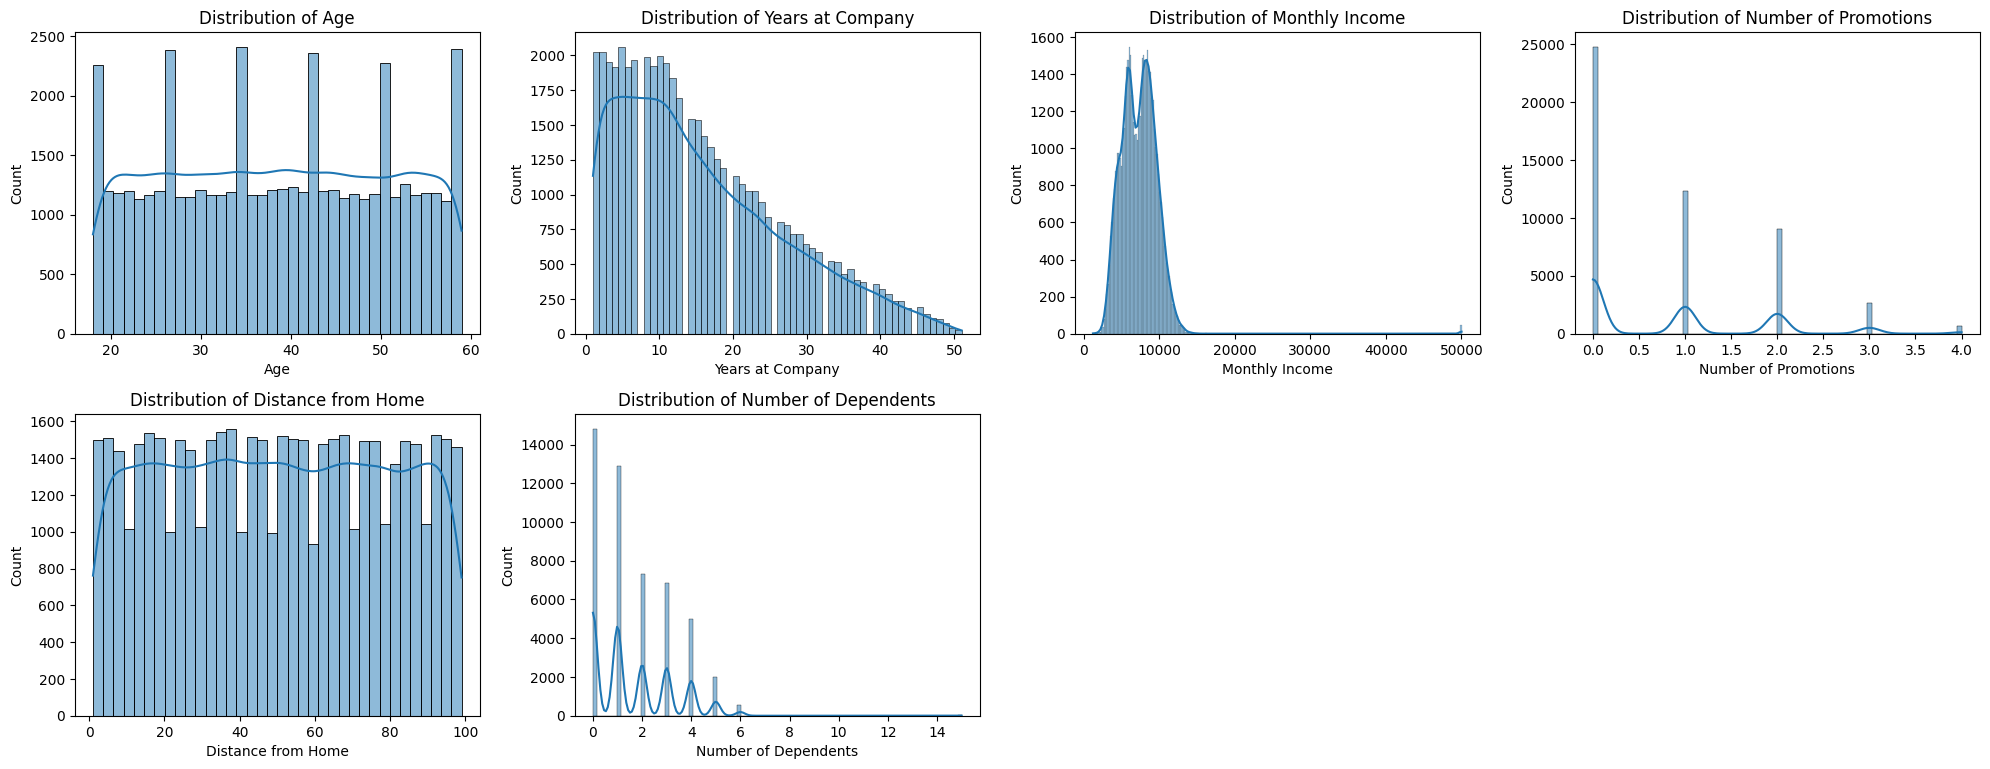

In [115]:
# Plot all the numerical columns to understand their distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, column in enumerate(numlist, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=x_train, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

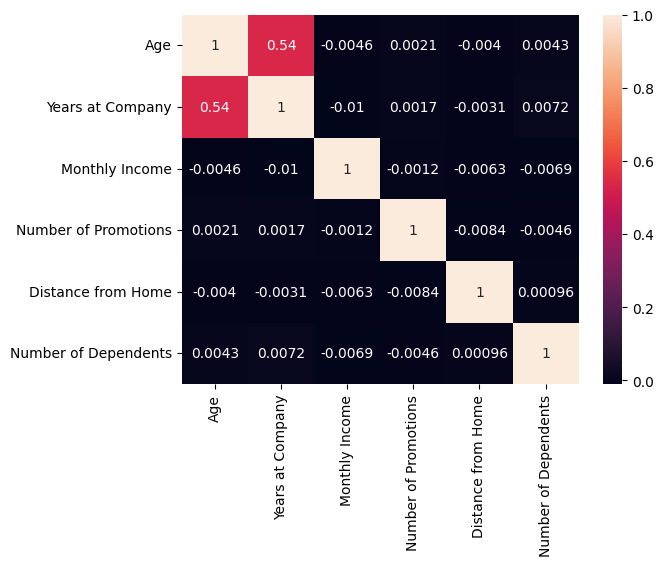

In [116]:
# Create correlation matrix for numerical columns
x_train_corr = x_train[numlist].corr()

# Plot Heatmap of the correlation matrix
sns.heatmap(x_train_corr, annot = True)
plt.show()

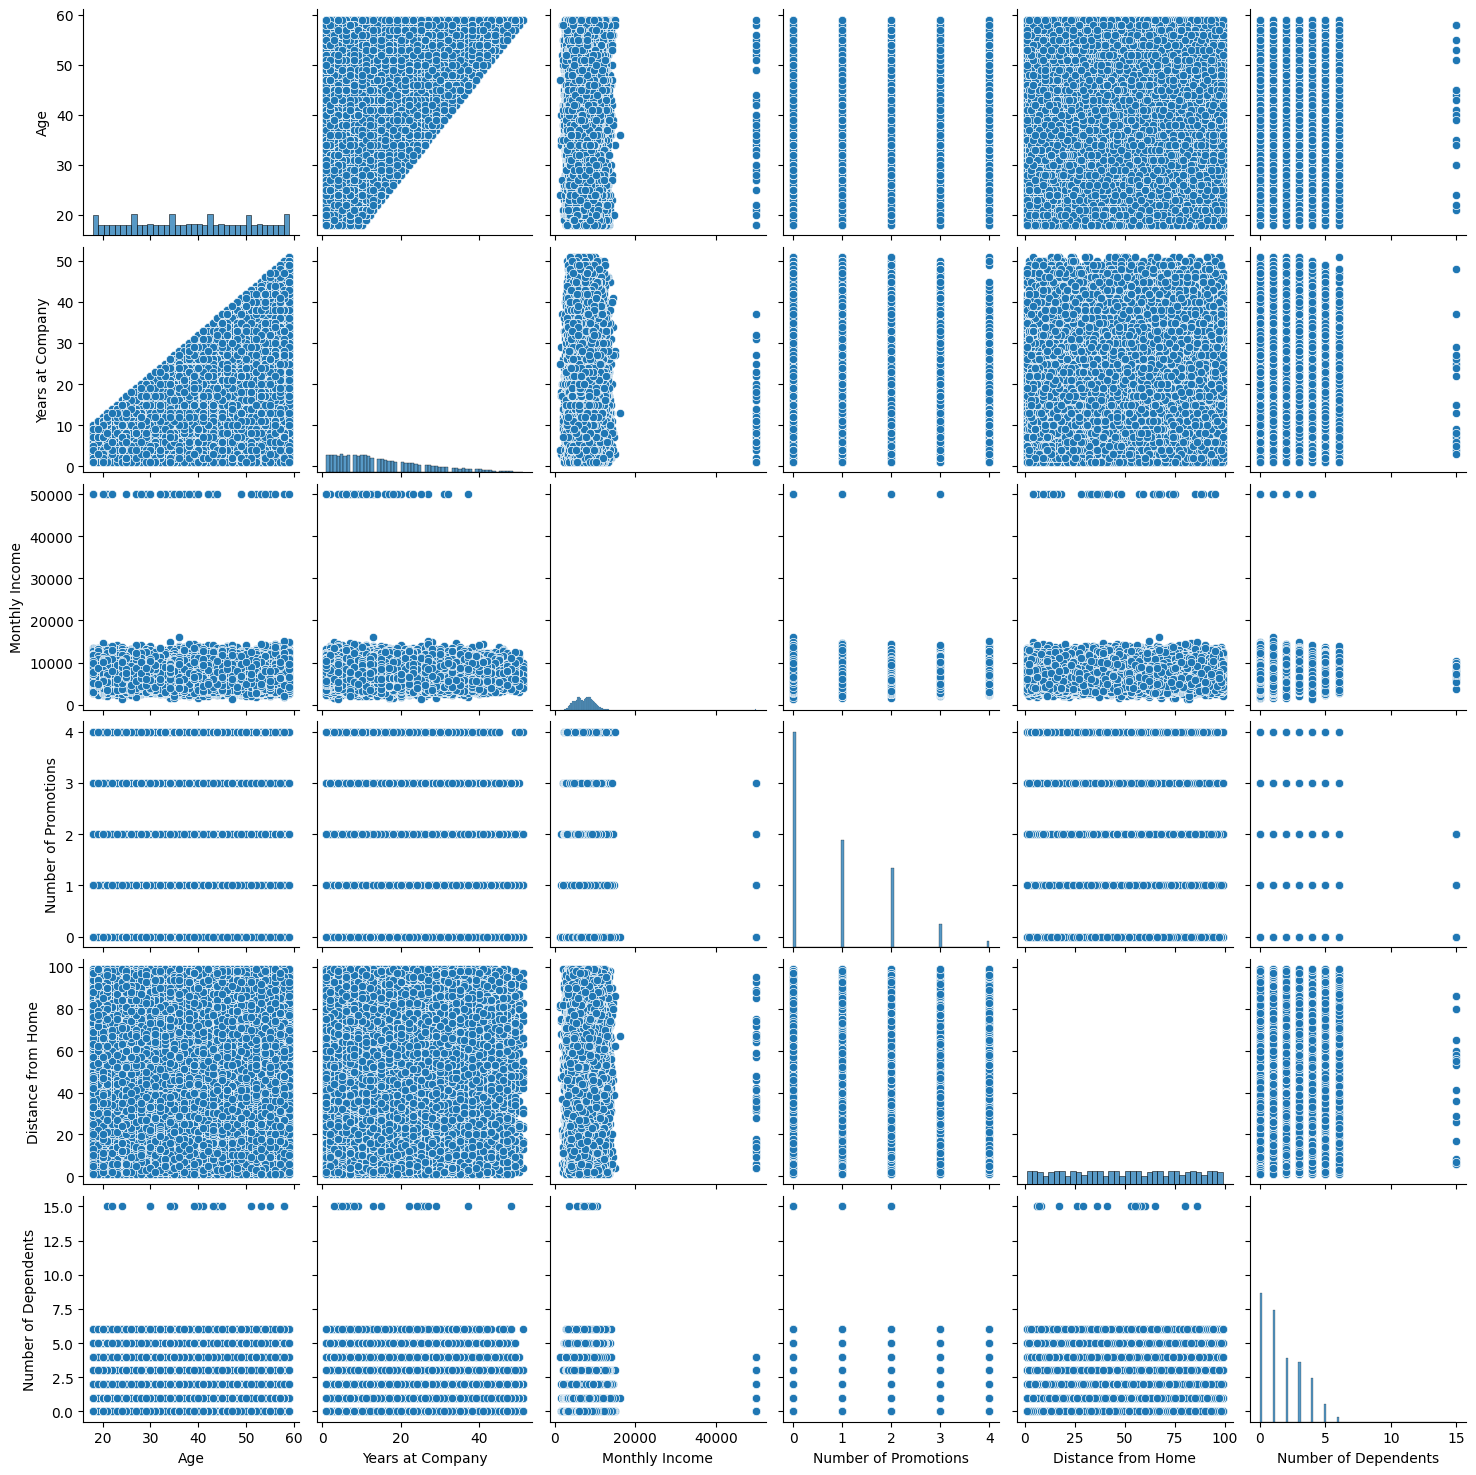

In [118]:
sns.pairplot(x_train)

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

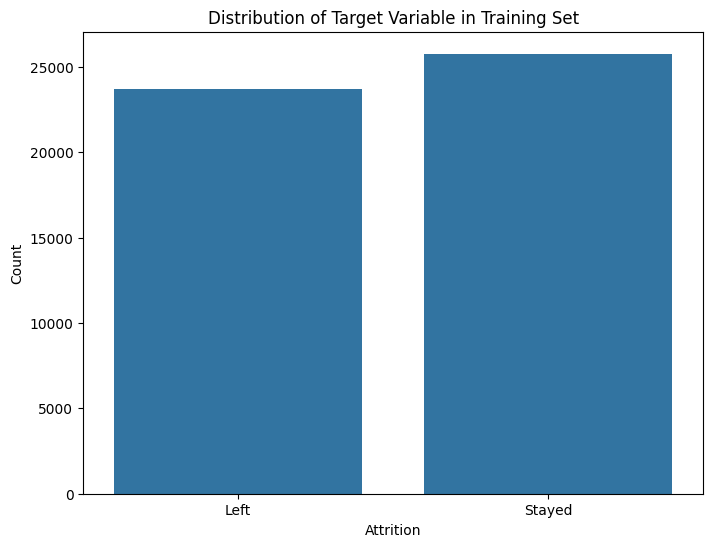

In [119]:
# Plot a bar chart to check class balance
# Plot a bar chart to check class balance
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [120]:
y_train.value_counts()

df.select_dtypes(include=['object']).columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

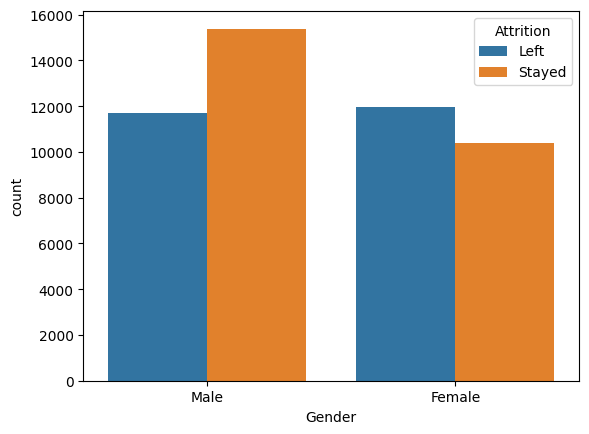

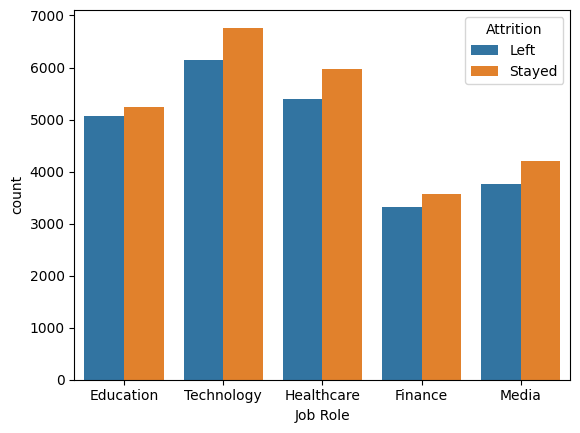

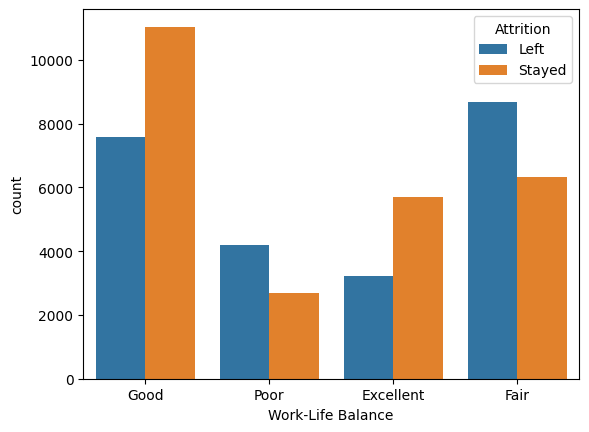

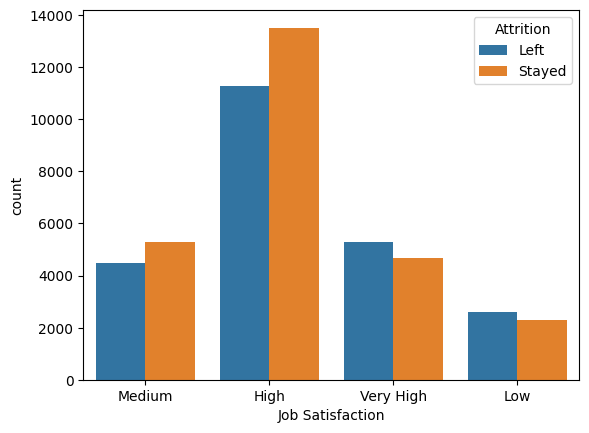

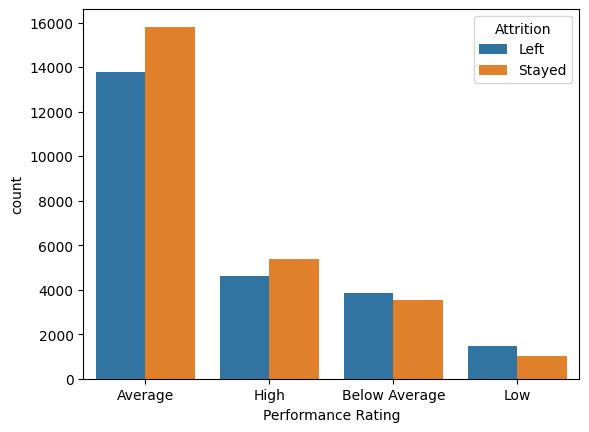

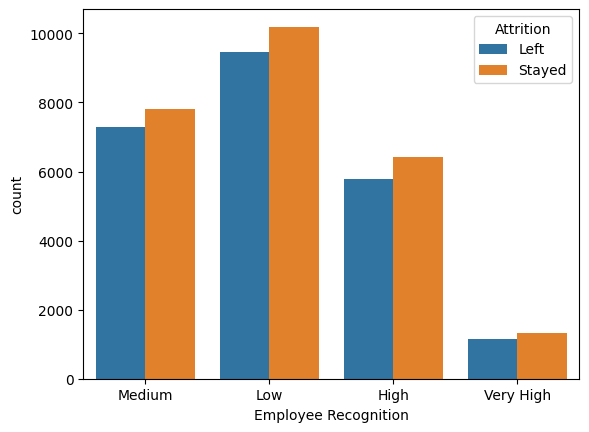

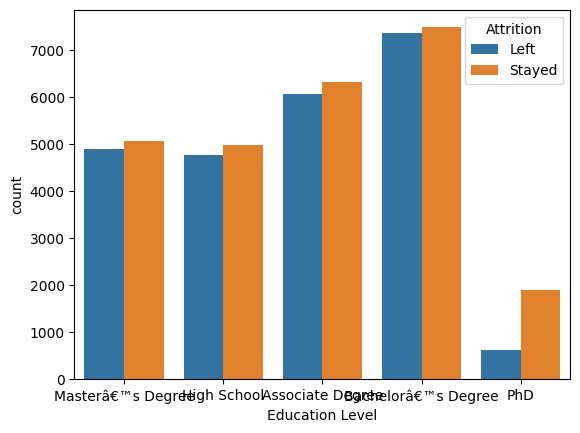

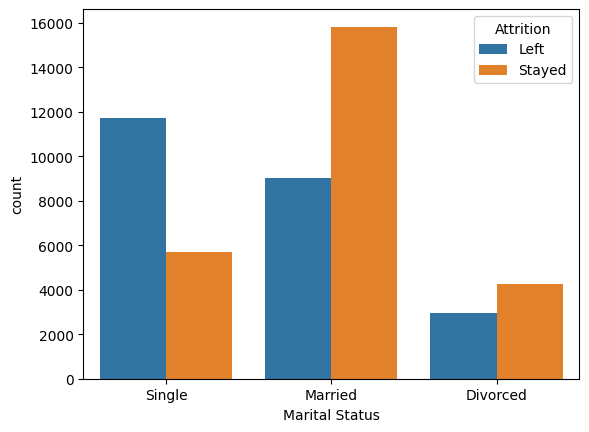

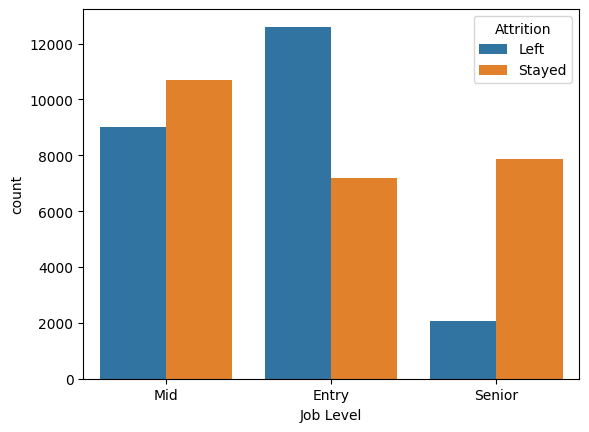

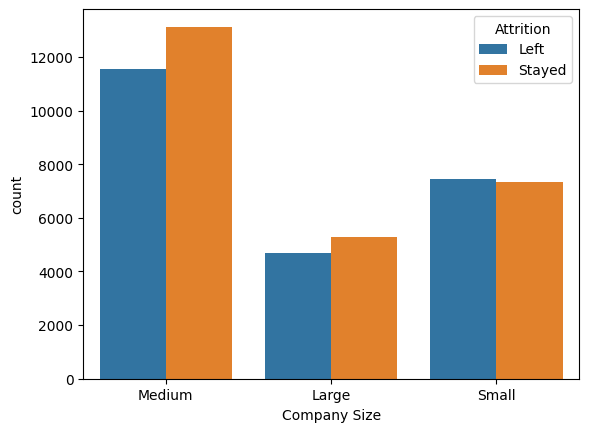

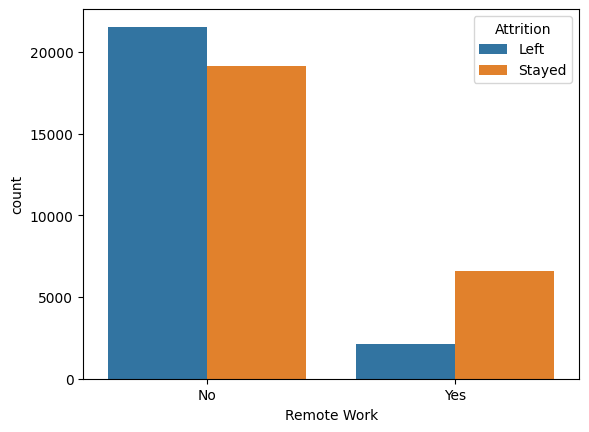

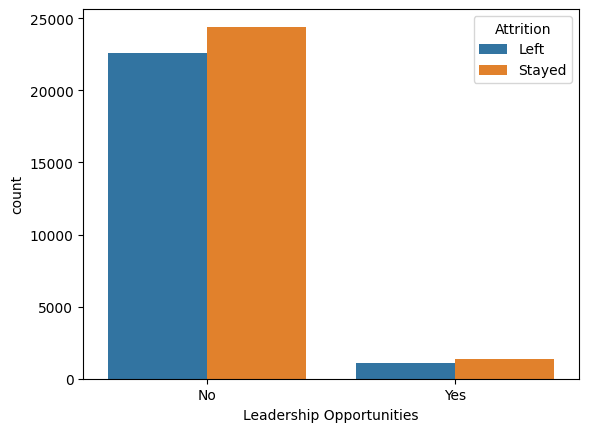

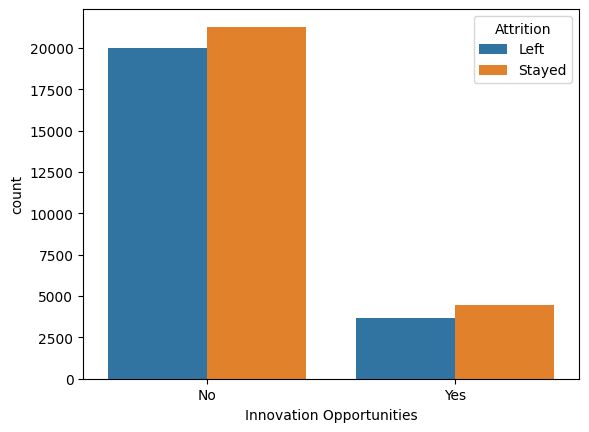

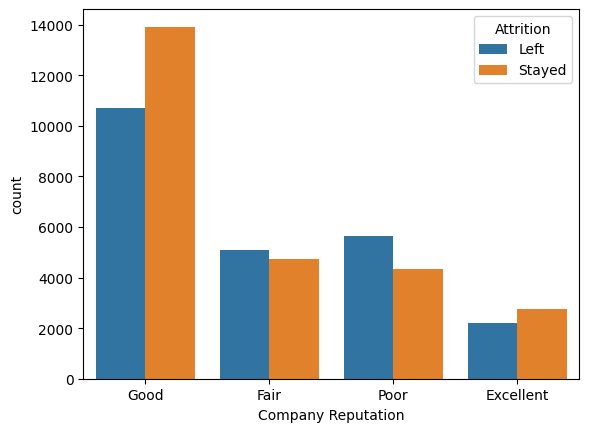

In [121]:
# Plot distribution for each categorical column with target variable

sns.countplot(x =x_train["Gender"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Job Role"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Work-Life Balance"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Job Satisfaction"], hue = y_train)
plt.show()


sns.countplot(x =x_train["Performance Rating"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Overtime"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Employee Recognition"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Education Level"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Marital Status"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Job Level"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Company Size"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Remote Work"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Leadership Opportunities"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Innovation Opportunities"], hue = y_train)
plt.show()

sns.countplot(x =x_train["Company Reputation"], hue = y_train)
plt.show()



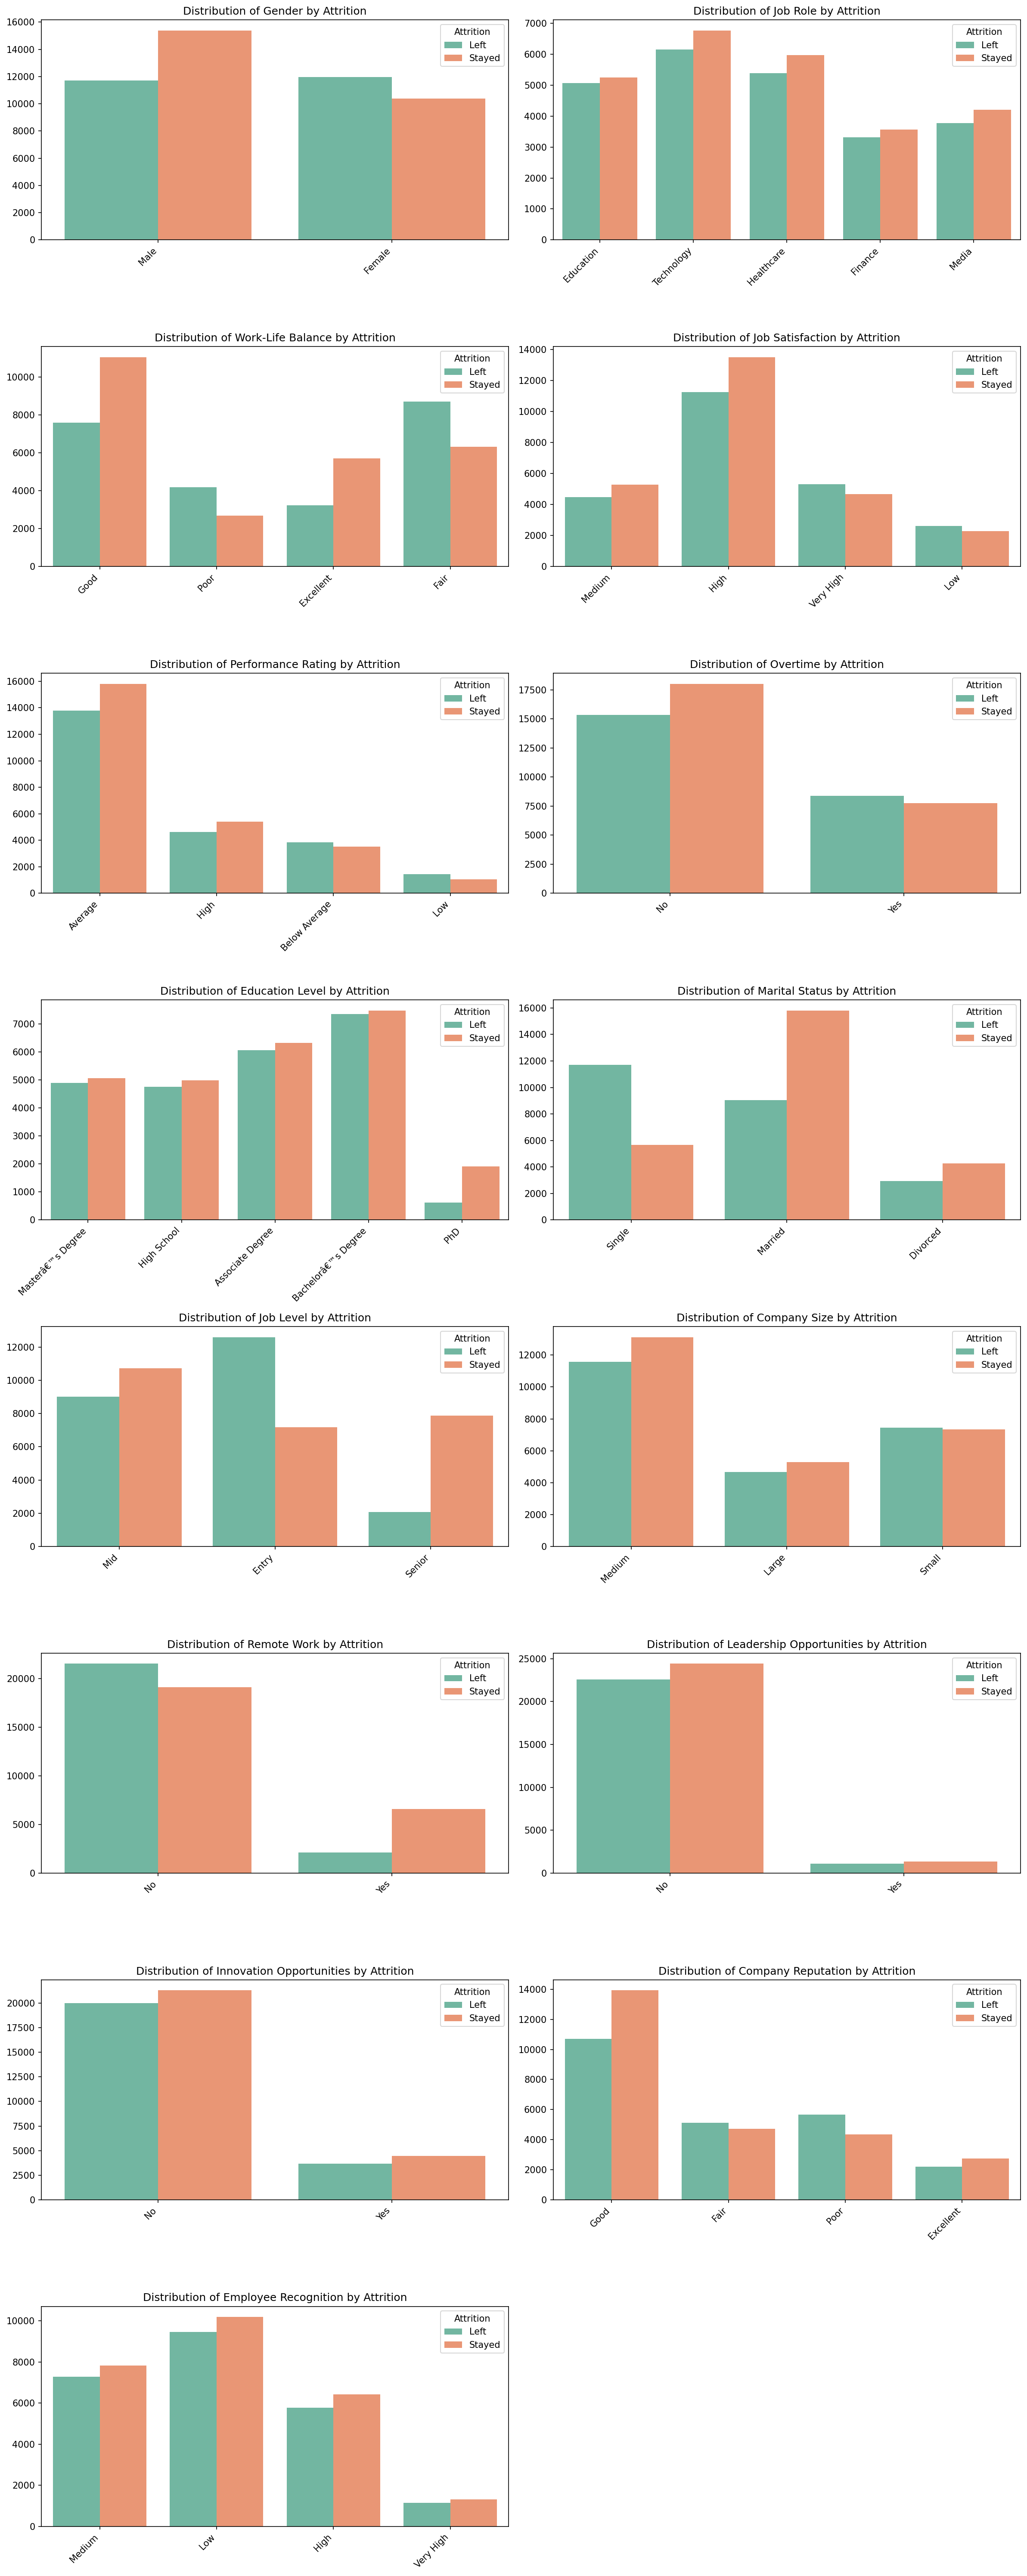

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

# Get categorical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns

# Set up rows and columns for subplots
num_cols = len(categorical_columns)
cols = 2  # As requested
rows = math.ceil(num_cols / cols)

# Improved figure setup with better resolution
plt.figure(figsize=(cols * 8, rows * 5), dpi=150)

# Plotting each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=pd.concat([x_train, y_train], axis=1), x=column, hue='Attrition', palette='Set2')
    plt.title(f'Distribution of {column} by Attrition', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [127]:
# Select numerical columns
numerical_columns_val = x_test.describe().columns
numerical_columns_val 

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

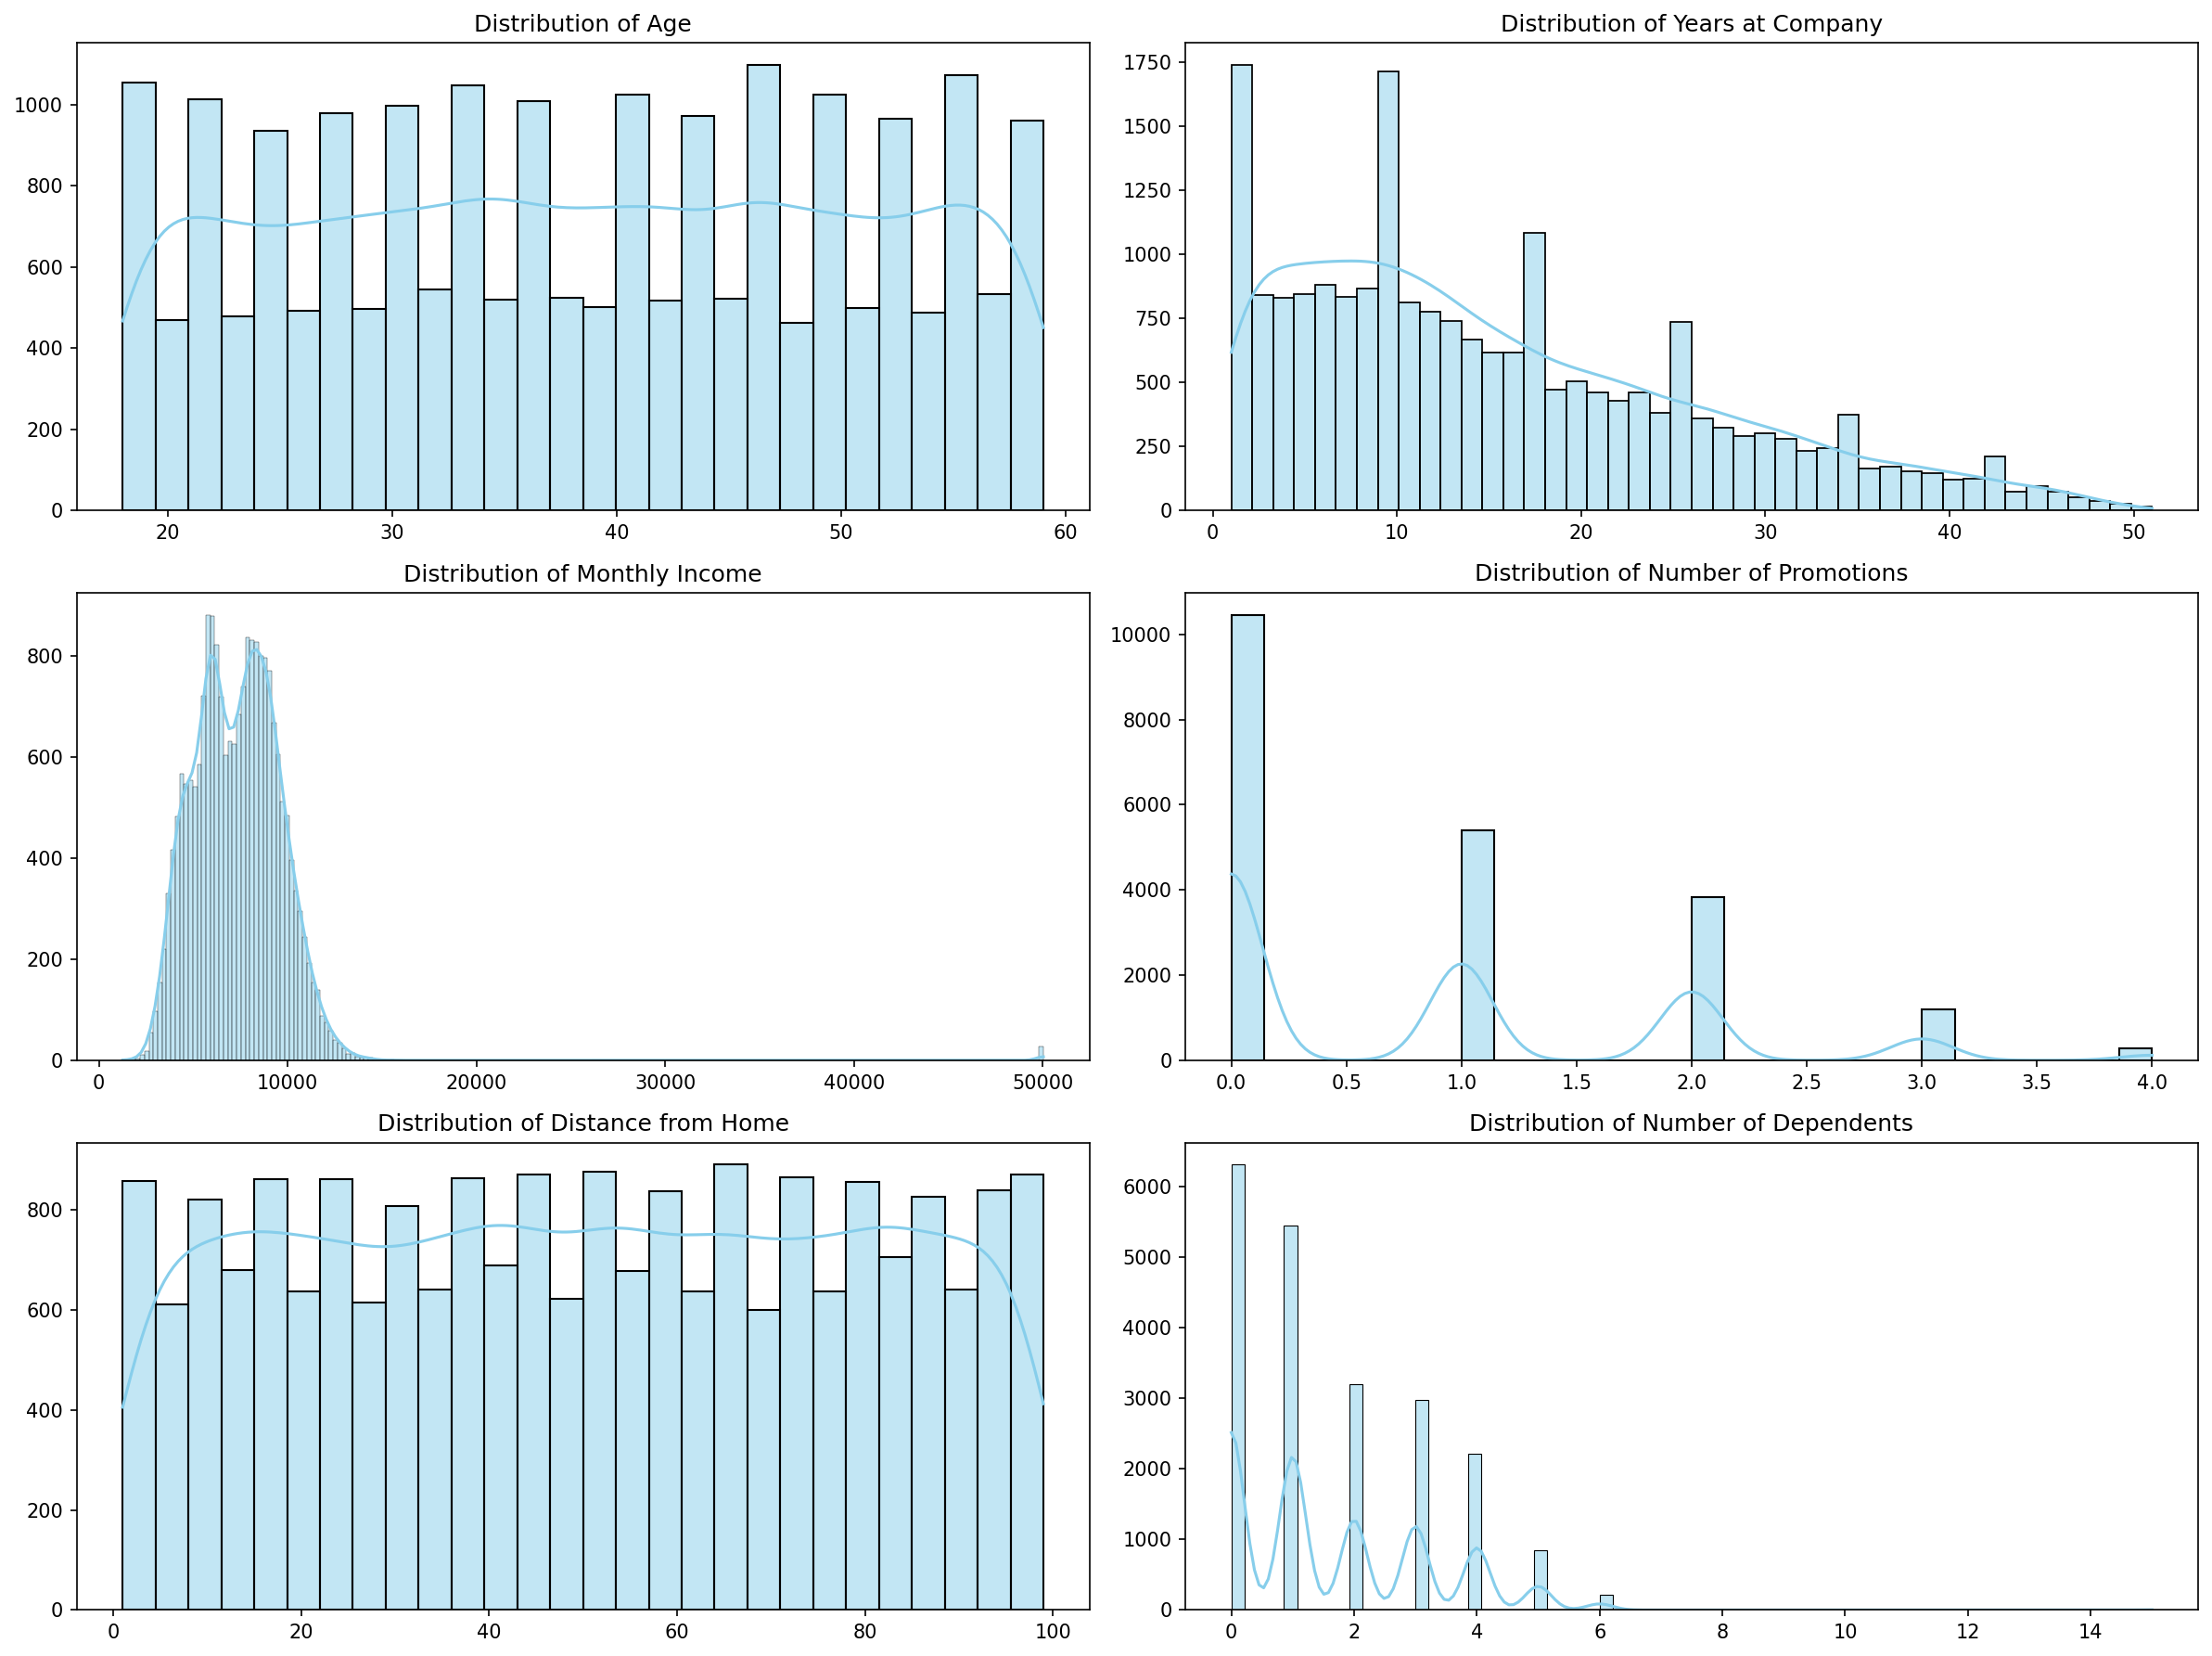

In [128]:
# Plot all the numerical columns to understand their distribution
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set up subplot layout
num_cols = len(numerical_columns_val)
cols = 2  # Two columns layout
rows = math.ceil(num_cols / cols)

# Improved figure with high resolution
plt.figure(figsize=(cols * 8, rows * 4), dpi=150)

# Plot each numerical column
for i, column in enumerate(numerical_columns_val, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=x_test, x=column, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()



### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

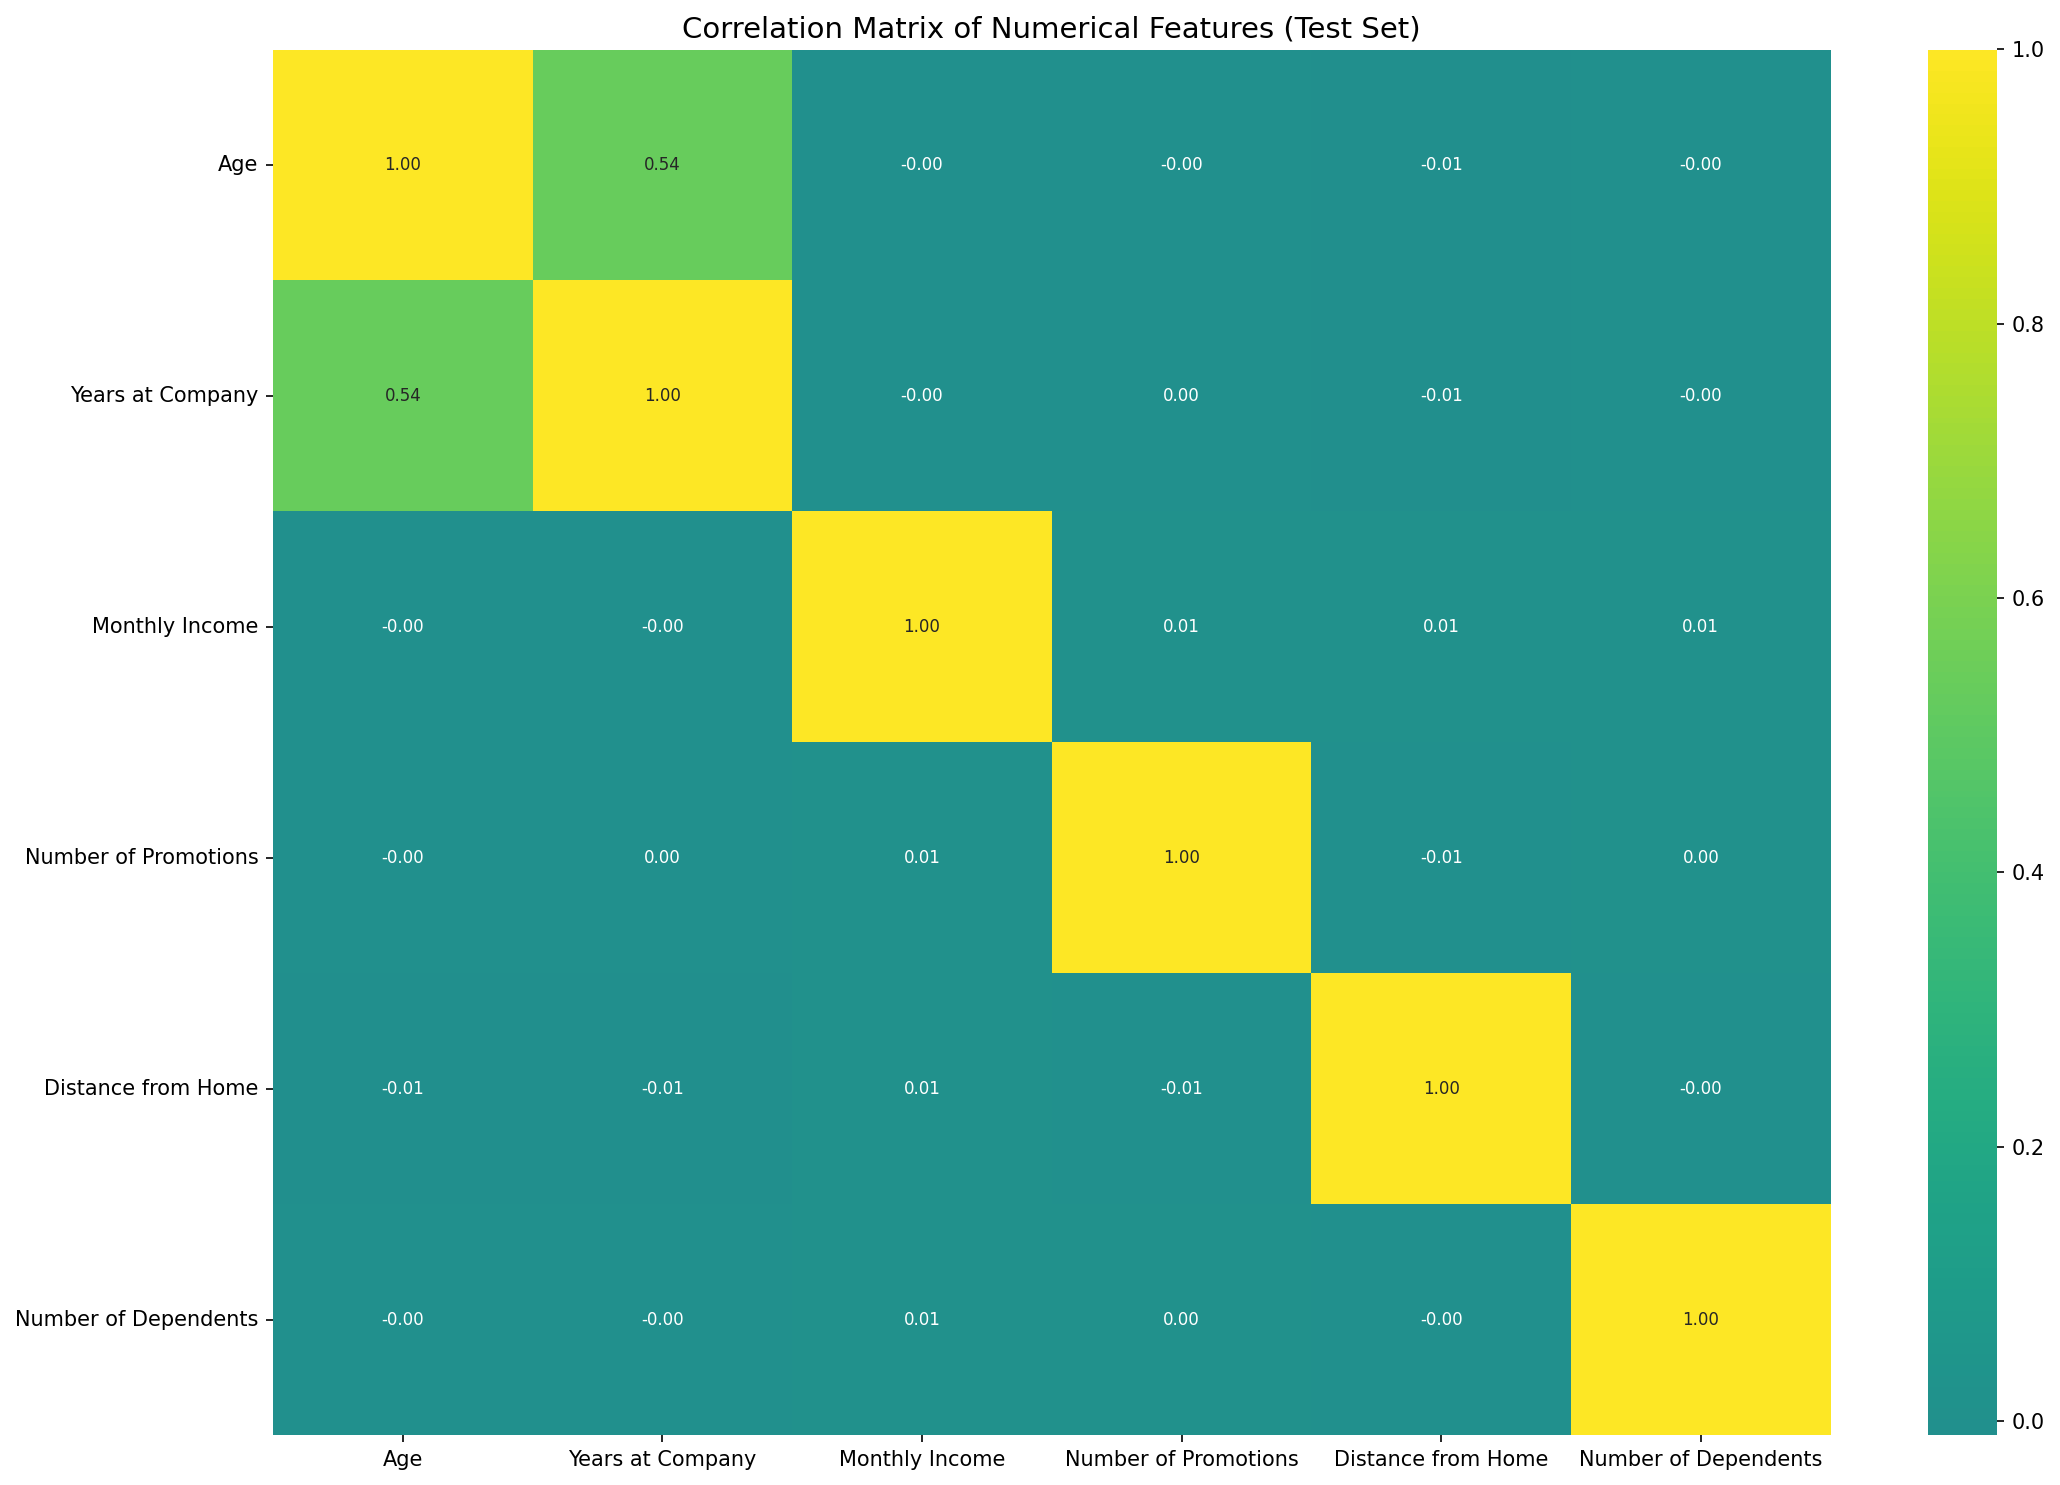

In [131]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix

# Create correlation matrix for numerical columns in x_test
correlation_matrix_test = x_test[numerical_columns_val].corr()

# Plot the heatmap with higher resolution
plt.figure(figsize=(15, 10), dpi=150)
sns.heatmap(correlation_matrix_test, annot=True, cmap='viridis', center=0, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features (Test Set)', fontsize=14)
plt.tight_layout()
plt.show()


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

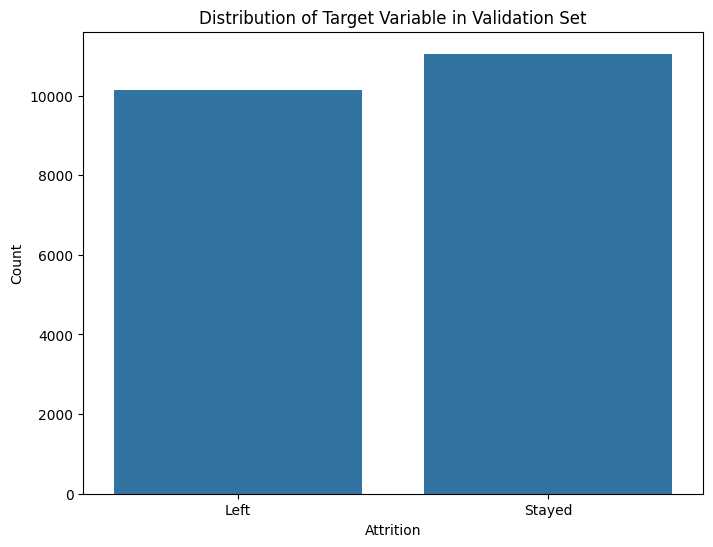

In [132]:
# Plot a bar chart to check class balance
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test)
plt.title('Distribution of Target Variable in Validation Set')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

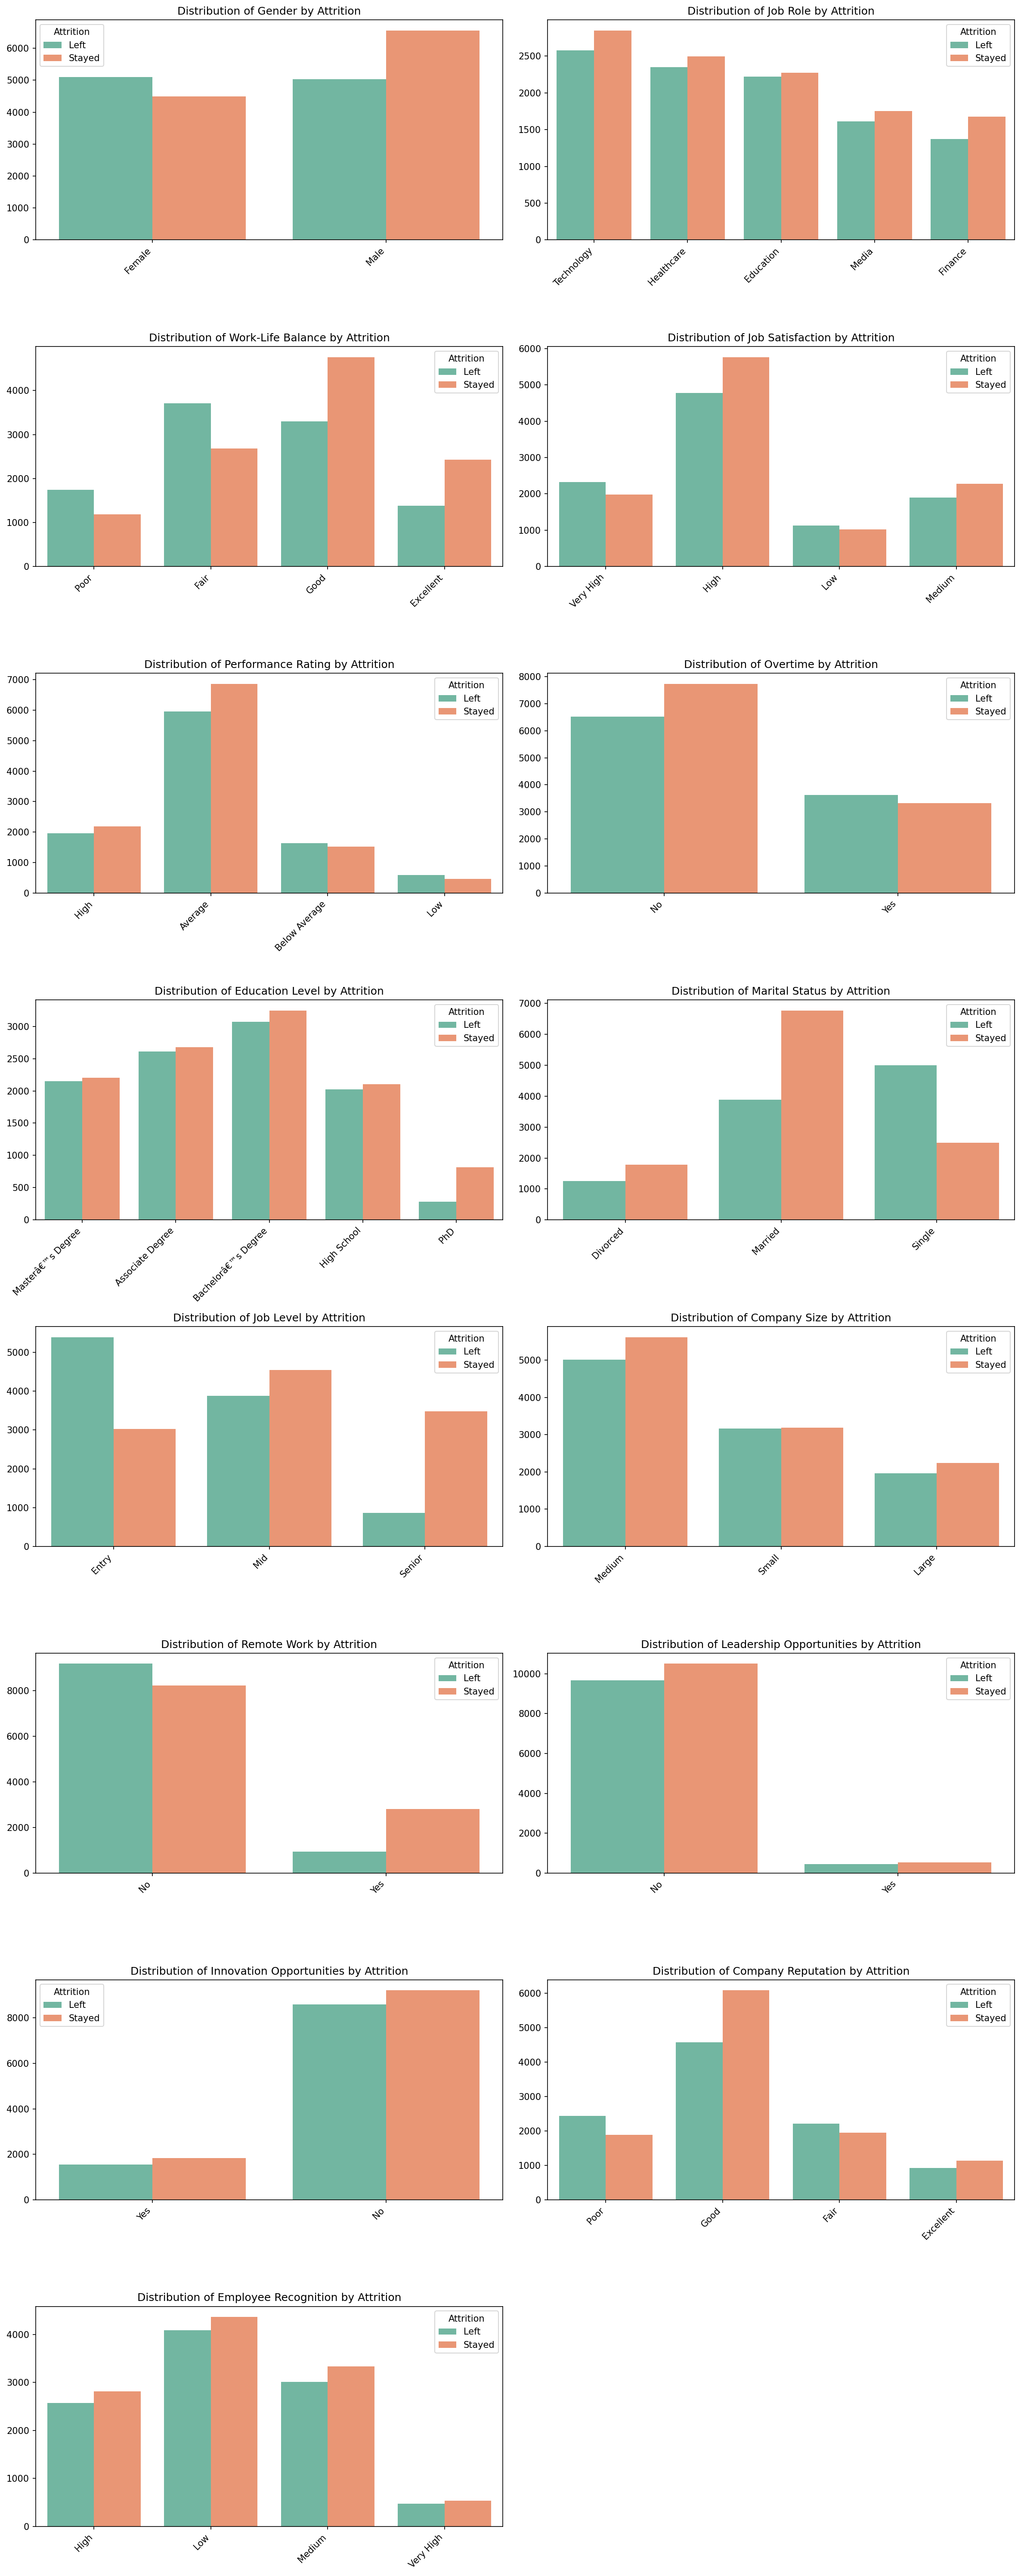

In [133]:
# Plot distribution for each categorical column with target variable
# Get categorical columns from x_test
categorical_columns_val = x_test.select_dtypes(include=['object']).columns

# Define layout
num_cols = len(categorical_columns_val)
cols = 2  # Two columns
rows = math.ceil(num_cols / cols)

# High-res plot setup
plt.figure(figsize=(cols * 8, rows * 5), dpi=150)

# Plot each categorical column with hue='Attrition'
for i, column in enumerate(categorical_columns_val, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=pd.concat([x_test, y_test], axis=1), x=column, hue='Attrition', palette='Set2')
    plt.title(f'Distribution of {column} by Attrition', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()



## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [135]:
# Check the categorical columns

# following columns need dummy variables
catlist = ["Gender", "Job Role", "Work-Life Balance","Job Satisfaction","Performance Rating", "Education Level", "Marital Status", "Company Size", "Company Reputation", "Employee Recognition", "Job Level", "Overtime","Remote Work","Leadership Opportunities", "Innovation Opportunities"]

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [136]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy1 = pd.get_dummies(x_train[catlist], drop_first = True, dtype=int)

# Add the results to the master DataFrame
x_train = pd.concat([x_train, dummy1], axis = 1)


In [137]:
x_train.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
16689   56    Male                30   Education            5089   
28815   25  Female                 4   Education            4161   
5542    22  Female                 6  Technology            7933   
63115   45  Female                20  Technology            7512   
23804   49  Female                20  Healthcare            7255   

      Work-Life Balance Job Satisfaction Performance Rating  \
16689              Good           Medium            Average   
28815              Poor             High            Average   
5542          Excellent             High               High   
63115              Good             High               High   
23804              Good        Very High            Average   

       Number of Promotions Overtime  ...  Company Reputation_Poor  \
16689                     2       No  ...                        0   
28815                     0       No  ...                        0   
5542                      0       No  ...                        0   
63115                     0       No  ...                        1   
23804                     0      Yes  ...                        0   

      Employee Recognition_Low Employee Recognition_Medium  \
16689                        0                           1   
28815                        1                           0   
5542                         1                           0   
63115                        1                           0   
23804                        1                           0   

       Employee Recognition_Very High Job Level_Mid Job Level_Senior  \
16689                               0             1                0   
28815                               0             1                0   
5542                                0             0                0   
63115                               0             1                0   
23804                               0             0                0   

      Overtime_Yes Remote Work_Yes Leadership Opportunities_Yes  \
16689            0               0                            0   
28815            0               1                            0   
5542             0               0                            0   
63115            0               1                            0   
23804            1               0                            0   

      Innovation Opportunities_Yes  
16689                            0  
28815                            0  
5542                             0  
63115                            0  
23804                            0  

[5 rows x 55 columns]

Now, drop the original categorical columns and check the DataFrame

In [138]:
# Drop the original categorical columns and check the DataFrame
x_train.drop(x_train[catlist], inplace=True, axis=1)

In [139]:
x_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
16689   56                30            5089                     2   
28815   25                 4            4161                     0   
5542    22                 6            7933                     0   
63115   45                20            7512                     0   
23804   49                20            7255                     0   

       Distance from Home  Number of Dependents  Gender_Male  \
16689                21.0                     1            1   
28815                47.0                     1            0   
5542                 13.0                     1            0   
63115                22.0                     0            0   
23804                64.0                     0            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
16689                 0                    0               0  ...   
28815                 0                    0               0  ...   
5542                  0                    0               0  ...   
63115                 0                    0               0  ...   
23804                 0                    1               0  ...   

       Company Reputation_Poor  Employee Recognition_Low  \
16689                        0                         0   
28815                        0                         1   
5542                         0                         1   
63115                        1                         1   
23804                        0                         1   

       Employee Recognition_Medium  Employee Recognition_Very High  \
16689                            1                               0   
28815                            0                               0   
5542                             0                               0   
63115                            0                               0   
23804                            0                               0   

       Job Level_Mid  Job Level_Senior  Overtime_Yes  Remote Work_Yes  \
16689              1                 0             0                0   
28815              1                 0             0                1   
5542               0                 0             0                0   
63115              1                 0             0                1   
23804              0                 0             1                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  
16689                             0                             0  
28815                             0                             0  
5542                              0                             0  
63115                             0                             0  
23804                             0                             0  

[5 rows x 40 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [140]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy2 = pd.get_dummies(x_test[catlist], drop_first = True, dtype=int)

# Add the results to the master DataFrame
x_test = pd.concat([x_test, dummy2], axis = 1)

Now, drop the original categorical columns and check the DataFrame

In [141]:
# Drop categorical columns and check the DataFrame
x_test.drop(x_test[catlist], inplace=True, axis=1)
x_test.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
17651   18                 9           11639                     3   
15666   30                 4            8184                     4   
20543   57                12            3038                     2   
22425   55                28            8751                     0   
14187   21                 6            8465                     1   

       Distance from Home  Number of Dependents  Gender_Male  \
17651                88.0                     3            0   
15666                27.0                     3            1   
20543                19.0                     4            0   
22425                71.0                     0            1   
14187                99.0                     0            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
17651                 0                    0               0  ...   
15666                 0                    1               0  ...   
20543                 0                    0               0  ...   
22425                 0                    1               0  ...   
14187                 0                    1               0  ...   

       Company Reputation_Poor  Employee Recognition_Low  \
17651                        1                         0   
15666                        1                         1   
20543                        0                         0   
22425                        0                         0   
14187                        0                         1   

       Employee Recognition_Medium  Employee Recognition_Very High  \
17651                            0                               0   
15666                            0                               0   
20543                            1                               0   
22425                            1                               0   
14187                            0                               0   

       Job Level_Mid  Job Level_Senior  Overtime_Yes  Remote Work_Yes  \
17651              0                 0             0                0   
15666              1                 0             0                0   
20543              1                 0             0                0   
22425              0                 0             0                1   
14187              1                 0             0                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  
17651                             0                             1  
15666                             0                             0  
20543                             0                             0  
22425                             0                             0  
14187                             0                             0  

[5 rows x 40 columns]

In [142]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49444 entries, 16689 to 35715
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  49444 non-null  int64  
 1   Years at Company                     49444 non-null  int64  
 2   Monthly Income                       49444 non-null  int64  
 3   Number of Promotions                 49444 non-null  int64  
 4   Distance from Home                   49444 non-null  float64
 5   Number of Dependents                 49444 non-null  int64  
 6   Gender_Male                          49444 non-null  int32  
 7   Job Role_Finance                     49444 non-null  int32  
 8   Job Role_Healthcare                  49444 non-null  int32  
 9   Job Role_Media                       49444 non-null  int32  
 10  Job Role_Technology                  49444 non-null  int32  
 11  Work-Life Balance_Fair       

In [143]:
x_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
16689   56                30            5089                     2   
28815   25                 4            4161                     0   
5542    22                 6            7933                     0   
63115   45                20            7512                     0   
23804   49                20            7255                     0   

       Distance from Home  Number of Dependents  Gender_Male  \
16689                21.0                     1            1   
28815                47.0                     1            0   
5542                 13.0                     1            0   
63115                22.0                     0            0   
23804                64.0                     0            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
16689                 0                    0               0  ...   
28815                 0                    0               0  ...   
5542                  0                    0               0  ...   
63115                 0                    0               0  ...   
23804                 0                    1               0  ...   

       Company Reputation_Poor  Employee Recognition_Low  \
16689                        0                         0   
28815                        0                         1   
5542                         0                         1   
63115                        1                         1   
23804                        0                         1   

       Employee Recognition_Medium  Employee Recognition_Very High  \
16689                            1                               0   
28815                            0                               0   
5542                             0                               0   
63115                            0                               0   
23804                            0                               0   

       Job Level_Mid  Job Level_Senior  Overtime_Yes  Remote Work_Yes  \
16689              1                 0             0                0   
28815              1                 0             0                1   
5542               0                 0             0                0   
63115              1                 0             0                1   
23804              0                 0             1                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  
16689                             0                             0  
28815                             0                             0  
5542                              0                             0  
63115                             0                             0  
23804                             0                             0  

[5 rows x 40 columns]

In [144]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21191 entries, 17651 to 22227
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  21191 non-null  int64  
 1   Years at Company                     21191 non-null  int64  
 2   Monthly Income                       21191 non-null  int64  
 3   Number of Promotions                 21191 non-null  int64  
 4   Distance from Home                   21191 non-null  float64
 5   Number of Dependents                 21191 non-null  int64  
 6   Gender_Male                          21191 non-null  int32  
 7   Job Role_Finance                     21191 non-null  int32  
 8   Job Role_Healthcare                  21191 non-null  int32  
 9   Job Role_Media                       21191 non-null  int32  
 10  Job Role_Technology                  21191 non-null  int32  
 11  Work-Life Balance_Fair       

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [145]:
# Convert y_train and y_validation to DataFrame to create dummy variables

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [146]:
# Create dummy variables using the 'get_dummies' for dependent column

dummy3 = pd.get_dummies(y_train, drop_first = True, dtype=int)

In [147]:
# Add the results to the master DataFrame
y_train = pd.concat([y_train, dummy3], axis = 1)
y_train

Attrition  Attrition_Stayed
16689      Left                 0
28815    Stayed                 1
5542       Left                 0
63115    Stayed                 1
23804    Stayed                 1
...         ...               ...
69357      Left                 0
44654      Left                 0
27512    Stayed                 1
4083     Stayed                 1
35715      Left                 0

[49444 rows x 2 columns]

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [148]:
# Create dummy variables using the 'get_dummies' for dependent column
dummy4 = pd.get_dummies(y_test, drop_first = True, dtype=int)


In [149]:
# Add the results to the master DataFrame
y_test = pd.concat([y_test, dummy4], axis = 1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [150]:
# Drop redundant columns from both train and validation
y_train.drop("Attrition", inplace=True, axis=1)
y_test.drop("Attrition", inplace=True, axis=1)

y_train.head()

Attrition_Stayed
16689                 0
28815                 1
5542                  0
63115                 1
23804                 1

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [151]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

In [153]:
x_train.describe()

Age  Years at Company  Monthly Income  Number of Promotions  \
count  49444.000000      49444.000000    49444.000000          49444.000000   
mean      38.516504         15.738088     7338.446040              0.827562   
std       12.082858         11.235085     2496.680431              0.992884   
min       18.000000          1.000000     1226.000000              0.000000   
25%       28.000000          7.000000     5656.000000              0.000000   
50%       39.000000         13.000000     7360.000000              0.000000   
75%       49.000000         23.000000     8875.000000              1.000000   
max       59.000000         51.000000    50030.000000              4.000000   

       Distance from Home  Number of Dependents   Gender_Male  \
count        49444.000000          49444.000000  49444.000000   
mean            49.933703              1.650979      0.548155   
std             28.536162              1.575811      0.497681   
min              1.000000              0.000000      0.000000   
25%             25.000000              0.000000      0.000000   
50%             50.000000              1.000000      1.000000   
75%             75.000000              3.000000      1.000000   
max             99.000000             15.000000      1.000000   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
count      49444.000000         49444.000000    49444.000000  ...   
mean           0.139087             0.229816        0.161334  ...   
std            0.346040             0.420718        0.367842  ...   
min            0.000000             0.000000        0.000000  ...   
25%            0.000000             0.000000        0.000000  ...   
50%            0.000000             0.000000        0.000000  ...   
75%            0.000000             0.000000        0.000000  ...   
max            1.000000             1.000000        1.000000  ...   

       Company Reputation_Poor  Employee Recognition_Low  \
count             49444.000000              49444.000000   
mean                  0.202674                  0.397682   
std                   0.401995                  0.489424   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  1.000000   
max                   1.000000                  1.000000   

       Employee Recognition_Medium  Employee Recognition_Very High  \
count                 49444.000000                    49444.000000   
mean                      0.305780                        0.049713   
std                       0.460742                        0.217353   
min                       0.000000                        0.000000   
25%                       0.000000                        0.000000   
50%                       0.000000                        0.000000   
75%                       1.000000                        0.000000   
max                       1.000000                        1.000000   

       Job Level_Mid  Job Level_Senior  Overtime_Yes  Remote Work_Yes  \
count   49444.000000      49444.000000  49444.000000     49444.000000   
mean        0.398956          0.200995      0.325661         0.176988   
std         0.489689          0.400748      0.468626         0.381662   
min         0.000000          0.000000      0.000000         0.000000   
25%         0.000000          0.000000      0.000000         0.000000   
50%         0.000000          0.000000      0.000000         0.000000   
75%         1.000000          0.000000      1.000000         0.000000   
max         1.000000          1.000000      1.000000         1.000000   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  
count                  49444.000000                  49444.000000  
mean                       0.049652                      0.164894  
std                        0.217227                      0.371

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [155]:
# Scale the numeric features present in the training set
Scaler = StandardScaler()
x_train[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]] = Scaler.fit_transform(x_train[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]])

# Scale the numerical features present in the validation set
x_test[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]] = Scaler.transform(x_test[["Age", "Years at Company", "Monthly Income", "Number of Promotions", "Distance from Home", "Number of Dependents"]])

In [156]:
x_train.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
16689  1.446982          1.269421       -0.900984              1.180853   
28815 -1.118662         -1.044781       -1.272681             -0.833502   
5542  -1.366951         -0.866766        0.238140             -0.833502   
63115  0.536592          0.379343        0.069515             -0.833502   
23804  0.867643          0.379343       -0.033423             -0.833502   

       Distance from Home  Number of Dependents  Gender_Male  \
16689           -1.013941             -0.413111            1   
28815           -0.102808             -0.413111            0   
5542            -1.294290             -0.413111            0   
63115           -0.978898             -1.047711            0   
23804            0.492934             -1.047711            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
16689                 0                    0               0  ...   
28815                 0                    0               0  ...   
5542                  0                    0               0  ...   
63115                 0                    0               0  ...   
23804                 0                    1               0  ...   

       Company Reputation_Poor  Employee Recognition_Low  \
16689                        0                         0   
28815                        0                         1   
5542                         0                         1   
63115                        1                         1   
23804                        0                         1   

       Employee Recognition_Medium  Employee Recognition_Very High  \
16689                            1                               0   
28815                            0                               0   
5542                             0                               0   
63115                            0                               0   
23804                            0                               0   

       Job Level_Mid  Job Level_Senior  Overtime_Yes  Remote Work_Yes  \
16689              1                 0             0                0   
28815              1                 0             0                1   
5542               0                 0             0                0   
63115              1                 0             0                1   
23804              0                 0             1                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  
16689                             0                             0  
28815                             0                             0  
5542                              0                             0  
63115                             0                             0  
23804                             0                             0  

[5 rows x 40 columns]

In [157]:
x_test.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
17651 -1.698001         -0.599742        1.722526              2.188030   
15666 -0.704849         -1.044781        0.338675              3.195208   
20543  1.529744         -0.332719       -1.722483              1.180853   
22425  1.364219          1.091406        0.565779             -0.833502   
14187 -1.449713         -0.866766        0.451225              0.173675   

       Distance from Home  Number of Dependents  Gender_Male  \
17651            1.333980              0.856089            0   
15666           -0.803680              0.856089            1   
20543           -1.084029              1.490689            0   
22425            0.738239             -1.047711            1   
14187            1.719460             -1.047711            0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
17651                 0                    0               0  ...   
15666                 0                    1               0  ...   
20543                 0                    0               0  ...   
22425                 0                    1               0  ...   
14187                 0                    1               0  ...   

       Company Reputation_Poor  Employee Recognition_Low  \
17651                        1                         0   
15666                        1                         1   
20543                        0                         0   
22425                        0                         0   
14187                        0                         1   

       Employee Recognition_Medium  Employee Recognition_Very High  \
17651                            0                               0   
15666                            0                               0   
20543                            1                               0   
22425                            1                               0   
14187                            0                               0   

       Job Level_Mid  Job Level_Senior  Overtime_Yes  Remote Work_Yes  \
17651              0                 0             0                0   
15666              1                 0             0                0   
20543              1                 0             0                0   
22425              0                 0             0                1   
14187              1                 0             0                0   

       Leadership Opportunities_Yes  Innovation Opportunities_Yes  
17651                             0                             1  
15666                             0                             0  
20543                             0                             0  
22425                             0                             0  
14187                             0                             0  

[5 rows x 40 columns]

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [158]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [159]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select= 15)
rfe = rfe.fit(x_train, y_train["Attrition_Stayed"])

In [160]:
# Display the features selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 16),
 ('Years at Company', False, 8),
 ('Monthly Income', False, 26),
 ('Number of Promotions', False, 5),
 ('Distance from Home', False, 2),
 ('Number of Dependents', False, 6),
 ('Gender_Male', True, 1),
 ('Job Role_Finance', False, 14),
 ('Job Role_Healthcare', False, 13),
 ('Job Role_Media', False, 11),
 ('Job Role_Technology', False, 12),
 ('Work-Life Balance_Fair', True, 1),
 ('Work-Life Balance_Good', False, 3),
 ('Work-Life Balance_Poor', True, 1),
 ('Job Satisfaction_Low', True, 1),
 ('Job Satisfaction_Medium', False, 20),
 ('Job Satisfaction_Very High', True, 1),
 ('Performance Rating_Below Average', True, 1),
 ('Performance Rating_High', False, 22),
 ('Performance Rating_Low', True, 1),
 ('Education Level_Bachelorâ€™s Degree', False, 21),
 ('Education Level_High School', False, 24),
 ('Education Level_Masterâ€™s Degree', False, 25),
 ('Education Level_PhD', True, 1),
 ('Marital Status_Married', False, 4),
 ('Marital Status_Single', True, 1),
 ('Company Size_M

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [161]:
# Put columns selected by RFE into variable 'col'
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False])

In [162]:
# Put columns selected by RFE into variable 'col'
col = x_train.columns[rfe.support_]
col

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single',
       'Company Reputation_Fair', 'Company Reputation_Poor', 'Job Level_Mid',
       'Job Level_Senior', 'Overtime_Yes', 'Remote Work_Yes'],
      dtype='object')

In [163]:
x_train.columns[~rfe.support_]

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Good', 'Job Satisfaction_Medium',
       'Performance Rating_High', 'Education Level_Bachelorâ€™s Degree',
       'Education Level_High School', 'Education Level_Masterâ€™s Degree',
       'Marital Status_Married', 'Company Size_Medium', 'Company Size_Small',
       'Company Reputation_Good', 'Employee Recognition_Low',
       'Employee Recognition_Medium', 'Employee Recognition_Very High',
       'Leadership Opportunities_Yes', 'Innovation Opportunities_Yes'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [164]:
# Select only the columns selected by RFE
x_train[col].columns

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single',
       'Company Reputation_Fair', 'Company Reputation_Poor', 'Job Level_Mid',
       'Job Level_Senior', 'Overtime_Yes', 'Remote Work_Yes'],
      dtype='object')

In [165]:
# View the training data
x_train[col].head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
16689            1                       0                       0   
28815            0                       0                       1   
5542             0                       0                       0   
63115            0                       0                       0   
23804            0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
16689                     0                           0   
28815                     0                           0   
5542                      0                           0   
63115                     0                           0   
23804                     0                           1   

       Performance Rating_Below Average  Performance Rating_Low  \
16689                                 0                       0   
28815                                 0                       0   
5542                                  0                       0   
63115                                 0                       0   
23804                                 0                       0   

       Education Level_PhD  Marital Status_Single  Company Reputation_Fair  \
16689                    0                      1                        0   
28815                    0                      0                        0   
5542                     0                      1                        1   
63115                    0                      0                        0   
23804                    0                      0                        0   

       Company Reputation_Poor  Job Level_Mid  Job Level_Senior  Overtime_Yes  \
16689                        0              1                 0             0   
28815                        0              1                 0             0   
5542                         0              0                 0             0   
63115                        1              1                 0             0   
23804                        0              0                 0             1   

       Remote Work_Yes  
16689                0  
28815                1  
5542                 0  
63115                1  
23804                0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [166]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train[col])

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [167]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25041.
Date:                Mon, 21 Apr 2025   Deviance:                       50081.
Time:                        22:16:51   Pearson chi2:                 4.63e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3104
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2469      0.028      8.734      0.000       0.191       0.302
Gender_Male                          0.5883      0.022     26.496      0.000       0.545       0.632
Work-Life Balance_Fair              -1.0796      0.025    -42.849      0.000      -1.129      -1.030
Work-Life Balance_Poor              -1.2561      0.034    -37.362      0.000      -1.322      -1.190
Job Satisfaction_Low                -0.4647      0.037    -12.472      0.000      -0.538      -0.392
Job Satisfaction_Very High          -0.4541      0.028    -16.387      0.000      -0.508      -0.400
Performance Rating_Below Average    -0.3302      0.031    -10.705      0.000      -0.391      -0.270
Performance Rating_Low              -0.6230      0.051    -12.118      0.000      -0.724      -0.522
Education Level_PhD                  1.5319      0.056     27.430      0.000       1.422       1.641
Marital Status_Single               -1.7066      0.025    -69.285      0.000      -1.755      -1.658
Company Reputation_Fair             -0.4925      0.028    -17.316      0.000      -0.548      -0.437
Company Reputation_Poor             -0.7567      0.029    -26.514      0.000      -0.813      -0.701
Job Level_Mid                        0.9618      0.024     39.761      0.000       0.914       1.009
Job Level_Senior                     2.5034      0.035     72.436      0.000       2.436       2.571
Overtime_Yes                        -0.3420      0.023    -14.600      0.000      -0.388      -0.296
Remote Work_Yes                      1.6991      0.032     52.987      0.000       1.636       1.762
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [168]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
# Make a VIF DataFrame for all the variables present
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(x_train[col])

variables       VIF
0                        Gender_Male  1.838186
1             Work-Life Balance_Fair  1.404538
2             Work-Life Balance_Poor  1.185637
3               Job Satisfaction_Low  1.114844
4         Job Satisfaction_Very High  1.233185
5   Performance Rating_Below Average  1.153200
6             Performance Rating_Low  1.052047
7                Education Level_PhD  1.045022
8              Marital Status_Single  1.419477
9            Company Reputation_Fair  1.255836
10           Company Reputation_Poor  1.260554
11                     Job Level_Mid  1.649004
12                  Job Level_Senior  1.325982
13                      Overtime_Yes  1.385670
14                   Remote Work_Yes  1.182770

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [170]:
# Predict the probabilities on the training set
y_train_pred = res.predict(x_train_sm)
y_train_pred

16689    0.522591
28815    0.839122
5542     0.124309
63115    0.895774
23804    0.366045
           ...   
69357    0.592773
44654    0.777613
27512    0.330614
4083     0.697460
35715    0.703988
Length: 49444, dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [171]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.52259147, 0.83912183, 0.12430859, ..., 0.33061351, 0.69746027,
       0.70398848])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [172]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Attrition Actual':y_train.values.reshape(-1), 'Attrition Prob':y_train_pred})
y_train_pred_final

Attrition Actual  Attrition Prob
0                     0        0.522591
1                     1        0.839122
2                     0        0.124309
3                     1        0.895774
4                     1        0.366045
...                 ...             ...
49439                 0        0.592773
49440                 0        0.777613
49441                 1        0.330614
49442                 1        0.697460
49443                 0        0.703988

[49444 rows x 2 columns]

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [173]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.5 else 0, axis=1)
y_train_pred_final

Attrition Actual  Attrition Prob  Predicted
0                     0        0.522591          1
1                     1        0.839122          1
2                     0        0.124309          0
3                     1        0.895774          1
4                     1        0.366045          0
...                 ...             ...        ...
49439                 0        0.592773          1
49440                 0        0.777613          1
49441                 1        0.330614          0
49442                 1        0.697460          1
49443                 0        0.703988          1

[49444 rows x 3 columns]

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [174]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"]))

0.7382493325782704


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [175]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"])
confusion

array([[17054,  6631],
       [ 6311, 19448]], dtype=int64)

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [176]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(TP, TN, FP, FN)

19448 17054 6631 6311


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [179]:
# Calculate sensitivity
sen = TP / float(TP + FN)

print(f"Sensitivity is: {sen:.5f}")


Sensitivity is: 0.75500


In [180]:
# Calculate specificity
spec = TN / float(TN + FP)
print(f"Specificity is: {spec:.4f}")


Specificity is: 0.7200


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [181]:
# Calculate precision
pre = TP / float(TP + FP)
print(f"Precision is: {pre:.4f}")


Precision is: 0.7457


In [182]:
# Calculate recall
rec = TP / float(TP + FN)
print(f"Recall is: {rec:.4f}")


Recall is: 0.7550


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [183]:
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

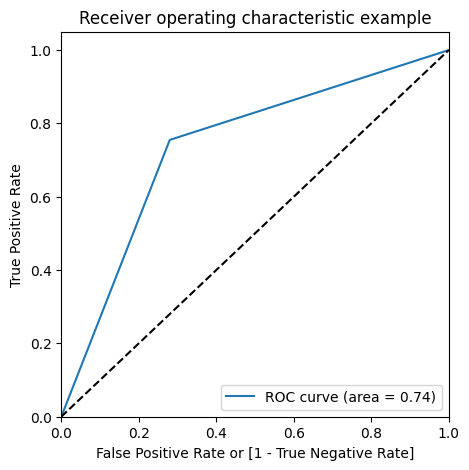

In [184]:
# Call the ROC function
draw_roc(y_train_pred_final["Attrition Actual"], y_train_pred_final["Predicted"])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [185]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Attrition Prob"].map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

Attrition Actual  Attrition Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0                 0        0.522591          1    1    1    1    1    1    1   
1                 1        0.839122          1    1    1    1    1    1    1   
2                 0        0.124309          0    1    1    0    0    0    0   
3                 1        0.895774          1    1    1    1    1    1    1   
4                 1        0.366045          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    1    1    0  
2    0    0    0    0  
3    1    1    1    0  
4    0    0    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [186]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.520973  1.000000  0.000000
0.1   0.1  0.590244  0.995031  0.150011
0.2   0.2  0.658199  0.963391  0.326282
0.3   0.3  0.704575  0.906984  0.484442
0.4   0.4  0.730766  0.841415  0.610429
0.5   0.5  0.738249  0.754998  0.720034
0.6   0.6  0.730159  0.643309  0.824615
0.7   0.7  0.705283  0.526379  0.899852
0.8   0.8  0.660222  0.387088  0.957273
0.9   0.9  0.590122  0.219962  0.992696


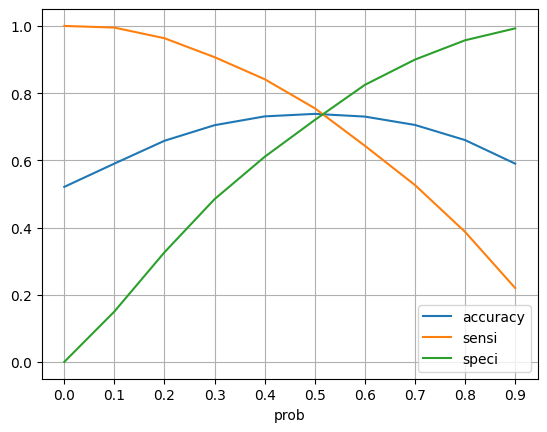

In [187]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.1))
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [188]:
# Create a column for final prediction based on the optimal cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.52 else 0, axis=1)
y_train_pred_final

Attrition Actual  Attrition Prob  Predicted  0.0  0.1  0.2  0.3  0.4  \
0                     0        0.522591          1    1    1    1    1    1   
1                     1        0.839122          1    1    1    1    1    1   
2                     0        0.124309          0    1    1    0    0    0   
3                     1        0.895774          1    1    1    1    1    1   
4                     1        0.366045          0    1    1    1    1    0   
...                 ...             ...        ...  ...  ...  ...  ...  ...   
49439                 0        0.592773          1    1    1    1    1    1   
49440                 0        0.777613          1    1    1    1    1    1   
49441                 1        0.330614          0    1    1    1    1    0   
49442                 1        0.697460          1    1    1    1    1    1   
49443                 0        0.703988          1    1    1    1    1    1   

       0.5  0.6  0.7  0.8  0.9  final_Predicted  
0        1    0    0    0    0                1  
1        1    1    1    1    0                1  
2        0    0    0    0    0                0  
3        1    1    1    1    0                1  
4        0    0    0    0    0                0  
...    ...  ...  ...  ...  ...              ...  
49439    1    0    0    0    0                1  
49440    1    1    1    0    0                1  
49441    0    0    0    0    0                0  
49442    1    1    0    0    0                1  
49443    1    1    1    0    0                1  

[49444 rows x 14 columns]

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [189]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"])
print(f"Model's accuracy is: {accuracy:.4f}")


Model's accuracy is: 0.7378


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [190]:
# Create the confusion matrix once again
confusion_f = metrics.confusion_matrix(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"])
confusion_f

array([[17553,  6132],
       [ 6831, 18928]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [191]:
# Create variables for true positive, true negative, false positive and false negative
TP_f = confusion_f[1,1] # true positive
TN_f = confusion_f[0,0] # true negatives
FP_f = confusion_f[0,1] # false positives
FN_f = confusion_f[1,0] # false negatives

print(TP_f, TN_f, FP_f, FN_f)

18928 17553 6132 6831


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [192]:
# Calculate Sensitivity
sensi_f = TP_f / float(TP_f + FN_f)
print(f"Sensitivity is: {sensi_f:.4f}")


Sensitivity is: 0.7348


In [193]:
# Calculate Specificity
spec_f = TN_f / float(TN_f + FP_f)
print(f"Specificity is: {spec_f:.4f}")


Specificity is: 0.7411


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [194]:
# Calculate Precision
pre_f = TP_f / float(TP_f + FP_f)
print(f"Precision is: {pre_f:.4f}")


Precision is: 0.7553


In [195]:
# Calculate Recall
rec_f = TP_f / float(TP_f + FN_f)
print(f"Recall is: {rec_f:.4f}")


Recall is: 0.7348


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [196]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [197]:
# Check actual and predicted values from initial model
y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"]

(0        0
 1        1
 2        0
 3        1
 4        1
         ..
 49439    0
 49440    0
 49441    1
 49442    1
 49443    0
 Name: Attrition Actual, Length: 49444, dtype: int32,
 0        1
 1        1
 2        0
 3        1
 4        0
         ..
 49439    1
 49440    1
 49441    0
 49442    1
 49443    1
 Name: final_Predicted, Length: 49444, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

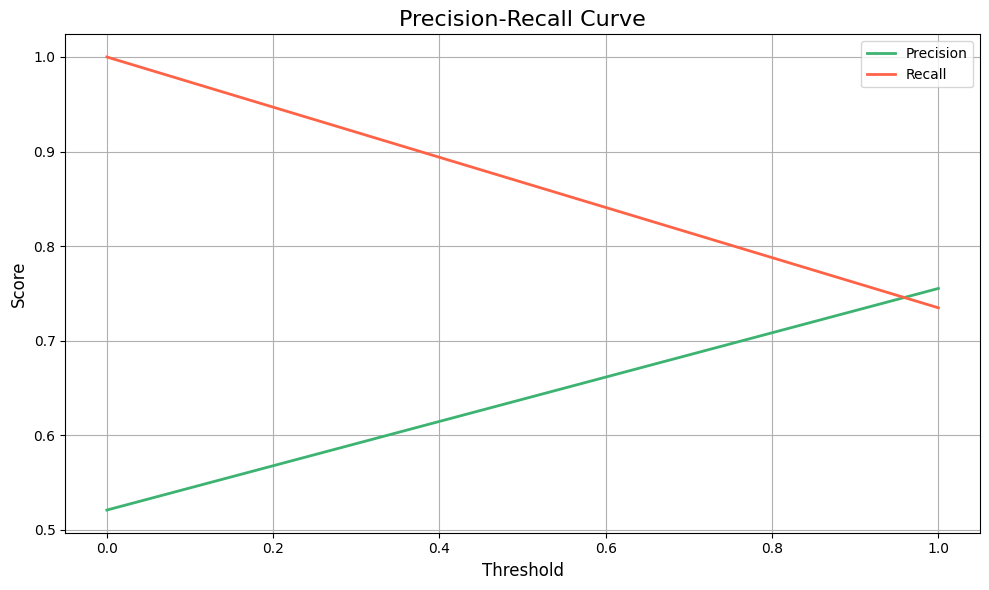

In [198]:
# Plot precision-recall curve
# Calculate precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final["Attrition Actual"], y_train_pred_final["final_Predicted"])

# Plot precision-recall curve with improved styling
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p[:-1], color='mediumseagreen', label='Precision', linewidth=2)
plt.plot(thresholds, r[:-1], color='tomato', label='Recall', linewidth=2)

# Add labels and title
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [199]:
# Select the relevant features for validation set
x_test = x_test[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [200]:
# Add constant to X_validation
x_test_sm = sm.add_constant(x_test[col])

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [201]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(x_test_sm)

# View predictions
y_validation_pred

17651    0.097971
15666    0.490195
20543    0.416876
22425    0.437351
14187    0.115922
           ...   
18269    0.377193
61107    0.286313
19351    0.482980
59933    0.108334
22227    0.939928
Length: 21191, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [202]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test)

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

# Append 'actual' and 'predicted_probability'
y_test_final = pd.concat([actual, predicted_probability], axis=1)
y_test_final.head()


Attrition_Stayed         0
0                 0  0.097971
1                 1  0.490195
2                 1  0.416876
3                 0  0.437351
4                 0  0.115922

In [203]:
y_test_final = y_test_final.rename(columns = {0: 'Attrition Prob'})
y_test_final.head()

Attrition_Stayed  Attrition Prob
0                 0        0.097971
1                 1        0.490195
2                 1        0.416876
3                 0        0.437351
4                 0        0.115922

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [204]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_test_final["final_Predicted"] = y_test_final.apply(lambda x: 1 if x['Attrition Prob'] > 0.52 else 0, axis=1)
# Check the DataFrame
y_test_final.head()

Attrition_Stayed  Attrition Prob  final_Predicted
0                 0        0.097971                0
1                 1        0.490195                0
2                 1        0.416876                0
3                 0        0.437351                0
4                 0        0.115922                0

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [205]:
# Calculate the overall accuracy
print(metrics.accuracy_score(y_test_final["Attrition_Stayed"], y_test_final["final_Predicted"]))

0.7381435515077155


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [206]:
# Create confusion matrix
confusion_t = metrics.confusion_matrix(y_test_final["Attrition_Stayed"], y_test_final["final_Predicted"])
confusion_t

array([[7493, 2647],
       [2902, 8149]], dtype=int64)

In [207]:
# Create variables for true positive, true negative, false positive and false negative
TP_t = confusion_t[1,1] # true positive
TN_t = confusion_t[0,0] # true negatives
FP_t = confusion_t[0,1] # false positives
FN_t = confusion_t[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [208]:
# Calculate Sensitivity
sensi_t = TP_t / float(TP_t + FN_t)
print(f"Sensitivity is: {sensi_t:.4f}")


Sensitivity is: 0.7374


In [209]:
# Calculate Specificity
spec_t = TN_t / float(TN_t + FP_t)
print(f"Specificity is: {spec_t:.4f}")


Specificity is: 0.7390


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [210]:
from sklearn.metrics import precision_score

# Calculate Precision
precision = precision_score(y_test_final["Attrition_Stayed"], y_test_final["final_Predicted"])
print(f"Precision is: {precision:.4f}")


Precision is: 0.7548


In [211]:
from sklearn.metrics import recall_score

# Calculate Recall
recall = recall_score(y_test_final["Attrition_Stayed"], y_test_final["final_Predicted"])
print(f"Recall is: {recall:.4f}")


Recall is: 0.7374


## Conclusion



## Model Performance Metrics

### Training Data

- **Sensitivity**: 0.7550
- **Specificity**: 0.7200

### Test Data

- **Sensitivity**: 0.7374
- **Specificity**: 0.7490
